In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_excel("Data_Train.xlsx")

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test=pd.read_excel("Test_set.xlsx")

In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train['source']='train'

In [7]:
test['source']='test'

In [8]:
df=pd.concat([train,test],axis=0,sort=False,ignore_index=True)

In [9]:
df.source.value_counts()

train    10683
test      2671
Name: source, dtype: int64

In [10]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
count,13354,13354,13354,13354,13353,13354,13354,13354,13353,13354,10683.000000,13354
unique,12,44,5,6,132,223,1451,374,5,10,NaN,2
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN,train
freq,4746,633,5682,5682,3000,288,536,672,7056,10493,NaN,10683
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000,NaN


In [11]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

In [33]:
approved_term = train[train['Total_Stops']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data_train[data_train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(15,8))

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376.0,train
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231.0,train
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392.0,train
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368.0,train
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303.0,train
1685,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 10 May,13h 30m,2 stops,No info,15129.0,train
1704,IndiGo,09/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,6860.0,train
1807,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 02 Jun,21h 40m,2 stops,In-flight meal not included,10919.0,train
1891,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,In-flight meal not included,10368.0,train
1971,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,04:25 11 May,29h 20m,2 stops,No info,15129.0,train


In [12]:
df.shape

(13354, 12)

In [13]:
df[df['Total_Stops']=='nan.np']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source


In [94]:
pp.ProfileReport(df_replace)

Number of variables,18
Number of observations,13354
Total Missing (%),1.1%
Total size in memory,1.8 MiB
Average record size in memory,140.0 B
Numeric,5
Categorical,10
Boolean,1
Date,1
Text (Unique),0
Rejected,1


In [35]:
import pandas_profiling as pp

C:\Users\VINOTH S\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\VINOTH S\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\VINOTH S\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\VINOTH S\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\VINOTH S\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\VINOTH S\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  

In [14]:
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
df.Price.max()

79512.0

In [41]:
df.query('Price'=79512.0)

SyntaxError: keyword can't be an expression (<ipython-input-41-aa61872ab7cf>, line 1)

In [16]:
df[df['Price']==79512.0]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0,train


In [17]:
df[df['Additional_Info']=='Business class']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0,train
3032,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,28097.0,train
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427.0,train
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209.0,train
12485,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,13:15,7h 30m,1 stop,Business class,NaN,test


In [18]:
df['Date_of_Journey_new'] = pd.to_datetime(df.Date_of_Journey)

In [19]:
df['Journey_quarter'] = df['Date_of_Journey_new'].dt.quarter

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019-03-24,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,2019-01-05,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,2019-09-06,3
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2019-12-05,4
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2019-01-03,1


In [21]:
df['Date_journey_day'] = df['Date_of_Journey_new'].dt.day

df[['Date_of_Journey_new', 'Date_journey_day']].head()

,Date_of_Journey_new,Date_journey_day
0,2019-03-24,24
1,2019-01-05,5
2,2019-09-06,6
3,2019-12-05,5
4,2019-01-03,3


In [22]:
df['Date_Journey_dayofweek'] = df['Date_of_Journey_new'].dt.dayofweek

df[['Date_of_Journey_new', 'Date_Journey_dayofweek']].head()

,Date_of_Journey_new,Date_Journey_dayofweek
0,2019-03-24,6
1,2019-01-05,5
2,2019-09-06,4
3,2019-12-05,3
4,2019-01-03,3


In [23]:
# day of the week - name

df['Date_Journey_dayweek'] = df['Date_of_Journey_new'].dt.weekday_name

df[['Date_of_Journey_new', 'Date_Journey_dayweek']].head()

,Date_of_Journey_new,Date_Journey_dayweek
0,2019-03-24,Sunday
1,2019-01-05,Saturday
2,2019-09-06,Friday
3,2019-12-05,Thursday
4,2019-01-03,Thursday


In [24]:

# was the application done on the weekend?

df['Date_Journey_is_weekend'] = np.where(df['Date_Journey_dayweek'].isin(['Sunday', 'Saturday']), 1,0)
df[['Date_of_Journey_new', 'Date_Journey_dayweek','Date_Journey_is_weekend']].head()

,Date_of_Journey_new,Date_Journey_dayweek,Date_Journey_is_weekend
0,2019-03-24,Sunday,1
1,2019-01-05,Saturday,1
2,2019-09-06,Friday,0
3,2019-12-05,Thursday,0
4,2019-01-03,Thursday,0


In [25]:
df['Date_Journey_year'] = df['Date_of_Journey_new'].dt.year

df[['Date_of_Journey_new', 'Date_Journey_year']].head()

,Date_of_Journey_new,Date_Journey_year
0,2019-03-24,2019
1,2019-01-05,2019
2,2019-09-06,2019
3,2019-12-05,2019
4,2019-01-03,2019


In [26]:
df.Date_Journey_year.value_counts()

2019    13354
Name: Date_Journey_year, dtype: int64

In [27]:
df.drop(columns=["Date_Journey_year"],inplace=True)

In [28]:
df.Total_Stops.value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [29]:
df[df['Total_Stops']=='non-stop']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019-03-24,1,24,6,Sunday,1
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,train,2019-06-24,2,24,0,Monday,0
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174.0,train,2019-04-18,2,18,3,Thursday,0
12,Air India,24/06/2019,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667.0,train,2019-06-24,2,24,0,Monday,0
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804.0,train,2019-04-24,2,24,2,Wednesday,0
22,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943.0,train,2019-03-04,1,4,0,Monday,0
23,IndiGo,1/05/2019,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823.0,train,2019-01-05,1,5,5,Saturday,1
28,Vistara,18/06/2019,Banglore,Delhi,BLR → DEL,09:45,12:35,2h 50m,non-stop,No info,4668.0,train,2019-06-18,2,18,1,Tuesday,0
29,Vistara,15/06/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687.0,train,2019-06-15,2,15,5,Saturday,1
30,Vistara,18/06/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687.0,train,2019-06-18,2,18,1,Tuesday,0


TypeError: unsupported operand type(s) for /: 'str' and 'int'

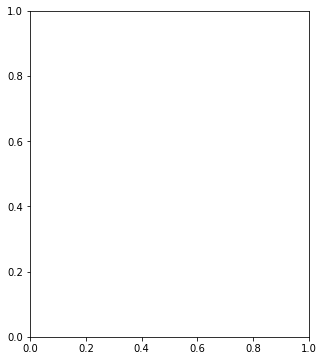

In [30]:
df.boxplot('Dep_Time','Airline',rot = 30,figsize=(5,6))

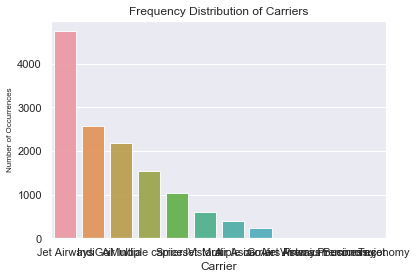

In [31]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = df['Airline'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=8)
plt.xlabel('Carrier', fontsize=12)
plt.show()

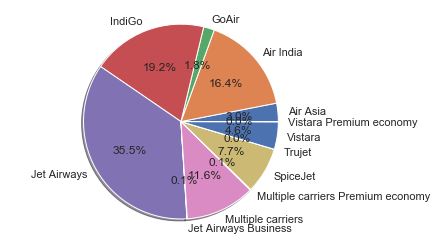

In [32]:
labels = df['Airline'].astype('category').cat.categories.tolist()
counts = df['Airline'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [33]:
replace_map = {'Airline': {'Jet Airways': 1, 'IndiGo': 2, 'Air India': 3, 'Multiple carriers': 4,'SpiceJet': 5, 'Vistara': 6, 'Air Asia': 7 , 'GoAir': 8 , 'Multiple carriers Premium economy': 9,'Jet Airways Business': 10,'Vistara Premium economy': 11,'Trujet': 12}}

In [34]:
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [35]:
labels = df['Airline'].astype('category').cat.categories.tolist()
replace_map_comp = {'Airline' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Airline': {'Air Asia': 1, 'Air India': 2, 'GoAir': 3, 'IndiGo': 4, 'Jet Airways': 5, 'Jet Airways Business': 6, 'Multiple carriers': 7, 'Multiple carriers Premium economy': 8, 'SpiceJet': 9, 'Trujet': 10, 'Vistara': 11, 'Vistara Premium economy': 12}}


In [36]:
df_replace = df.copy()

In [37]:
df_replace.replace(replace_map_comp, inplace=True)

print(df_replace.head())

   Airline Date_of_Journey    Source Destination                  Route  \
0        4      24/03/2019  Banglore   New Delhi              BLR → DEL   
1        2       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2        5       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3        4      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4        4      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price source  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  train   
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  train   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  train   
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  train   
4    16:50         21:35   4h 45m      1 stop         No info  13302.0  train   

  Date_of_Journey_new  Journey_quarter  Date_journey_day  \
0 

In [38]:
print(df_replace['Airline'].dtypes)

int64


In [39]:
df.Destination.value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [40]:
df_replace.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [41]:
df_replace.Additional_Info.replace({"No info":"No Info"},inplace=True)

In [42]:
df_replace.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend
0,4,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897.0,train,2019-03-24,1,24,6,Sunday,1
1,2,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,7662.0,train,2019-01-05,1,5,5,Saturday,1
2,5,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No Info,13882.0,train,2019-09-06,3,6,4,Friday,0
3,4,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No Info,6218.0,train,2019-12-05,4,5,3,Thursday,0
4,4,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No Info,13302.0,train,2019-01-03,1,3,3,Thursday,0


In [43]:
df_replace.Total_Stops.value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [44]:
replace_map = {'Total_Stops': {'non-stop': 'Zero', '1 stop': 'One', '2 stop': 'Two', '3 stops': 'Three','4 stops': 'Four'}}

In [45]:
labels = df_replace['Total_Stops'].astype('category').cat.categories.tolist()
replace_map_comp = {'Total_Stops' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Total_Stops': {'1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4, 'non-stop': 5}}


In [46]:
df_replace.Total_Stops.replace({'non-stop': 'Zero', '1 stop': 'One', '2 stops': 'Two', '3 stops': 'Three','4 stops': 'Four'},inplace=True)

In [47]:
df_replace.Route.nunique()

132

In [48]:
catagorical_columns=df_replace.select_dtypes(include='object')

In [49]:
catagorical_columns.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,source,Date_Journey_dayweek
0,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,Zero,No Info,train,Sunday
1,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,Two,No Info,train,Saturday
2,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,Two,No Info,train,Friday
3,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,One,No Info,train,Thursday
4,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,One,No Info,train,Thursday


In [50]:
numerical_columns=df_replace.select_dtypes(exclude='object')

In [51]:
numerical_columns.head()

,Airline,Price,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_is_weekend
0,4,3897.0,2019-03-24,1,24,6,1
1,2,7662.0,2019-01-05,1,5,5,1
2,5,13882.0,2019-09-06,3,6,4,0
3,4,6218.0,2019-12-05,4,5,3,0
4,4,13302.0,2019-01-03,1,3,3,0


In [52]:
encode=pd.get_dummies(catagorical_columns.drop(columns=["Route","Dep_Time","Arrival_Time","Duration","source","Date_Journey_dayweek"]))

In [53]:
encode.head()

,Date_of_Journey_01/03/2019,Date_of_Journey_03/03/2019,Date_of_Journey_06/03/2019,Date_of_Journey_09/03/2019,Date_of_Journey_1/03/2019,Date_of_Journey_1/04/2019,Date_of_Journey_1/05/2019,Date_of_Journey_1/06/2019,Date_of_Journey_12/03/2019,Date_of_Journey_12/04/2019,...,Total_Stops_Zero,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
encode1=pd.get_dummies(numerical_columns.drop(columns=["Price","Date_of_Journey_new","Date_journey_day"]))

In [55]:
encode1.head()

,Airline,Journey_quarter,Date_Journey_dayofweek,Date_Journey_is_weekend
0,4,1,6,1
1,2,1,5,1
2,5,3,4,0
3,4,4,3,0
4,4,1,3,0


In [56]:
df_replace['Airline'].dtypes

dtype('int64')

In [57]:
df_replace['Airline']=df_replace['Airline'].astype('object')

In [58]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019-03-24,1,24,6,Sunday,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,2019-01-05,1,5,5,Saturday,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,2019-09-06,3,6,4,Friday,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2019-12-05,4,5,3,Thursday,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2019-01-03,1,3,3,Thursday,0


In [59]:
df_replace.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend
0,4,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,Zero,No Info,3897.0,train,2019-03-24,1,24,6,Sunday,1
1,2,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,Two,No Info,7662.0,train,2019-01-05,1,5,5,Saturday,1
2,5,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,Two,No Info,13882.0,train,2019-09-06,3,6,4,Friday,0
3,4,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,One,No Info,6218.0,train,2019-12-05,4,5,3,Thursday,0
4,4,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,One,No Info,13302.0,train,2019-01-03,1,3,3,Thursday,0


In [60]:
processing_final=pd.concat([encode,encode1,numerical_columns["Price"],df[["source"]]],axis=1)

In [61]:
processing_final.isnull().sum()

Date_of_Journey_01/03/2019                         0
Date_of_Journey_03/03/2019                         0
Date_of_Journey_06/03/2019                         0
Date_of_Journey_09/03/2019                         0
Date_of_Journey_1/03/2019                          0
Date_of_Journey_1/04/2019                          0
Date_of_Journey_1/05/2019                          0
Date_of_Journey_1/06/2019                          0
Date_of_Journey_12/03/2019                         0
Date_of_Journey_12/04/2019                         0
Date_of_Journey_12/05/2019                         0
Date_of_Journey_12/06/2019                         0
Date_of_Journey_15/03/2019                         0
Date_of_Journey_15/04/2019                         0
Date_of_Journey_15/05/2019                         0
Date_of_Journey_15/06/2019                         0
Date_of_Journey_18/03/2019                         0
Date_of_Journey_18/04/2019                         0
Date_of_Journey_18/05/2019                    

In [62]:
processing_final.source.value_counts()

train    10683
test      2671
Name: source, dtype: int64

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [83]:
print(X_train.shape)
print(y_train.shape)

(8546, 73)
(8546,)


In [109]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.3))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               9472      
_________________________________________________________________
dense_23 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 257       
Total params: 174,337
Trainable params: 174,337
Non-trainable params: 0
_________________________________________________________________


In [105]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [110]:
NN_model.fit(X_train, y_train, epochs=350, batch_size=32, validation_split = 0.2)#, callbacks=callbacks_list


Train on 6836 samples, validate on 1710 samples
Epoch 1/350
6836/6836 [==============================] - ETA: 5:09 - loss: 9713.5088 - mean_absolute_error: 9713.508 - ETA: 52s - loss: 9043.3356 - mean_absolute_error: 9043.335 - ETA: 46s - loss: 9074.3216 - mean_absolute_error: 9074.32 - ETA: 33s - loss: 9066.4091 - mean_absolute_error: 9066.40 - ETA: 26s - loss: 8979.8515 - mean_absolute_error: 8979.85 - ETA: 20s - loss: 8920.2608 - mean_absolute_error: 8920.26 - ETA: 15s - loss: 9001.8466 - mean_absolute_error: 9001.84 - ETA: 12s - loss: 9009.0992 - mean_absolute_error: 9009.09 - ETA: 11s - loss: 8962.2403 - mean_absolute_error: 8962.24 - ETA: 9s - loss: 8858.2140 - mean_absolute_error: 8858.2140 - ETA: 8s - loss: 8655.6812 - mean_absolute_error: 8655.681 - ETA: 7s - loss: 8380.3154 - mean_absolute_error: 8380.315 - ETA: 6s - loss: 8012.0231 - mean_absolute_error: 8012.023 - ETA: 6s - loss: 7720.3300 - mean_absolute_error: 7720.330 - ETA: 5s - loss: 7401.0761 - mean_absolute_error: 74

6836/6836 [==============================] - ETA: 2s - loss: 1993.2108 - mean_absolute_error: 1993.210 - ETA: 1s - loss: 1882.6310 - mean_absolute_error: 1882.631 - ETA: 1s - loss: 2026.4044 - mean_absolute_error: 2026.404 - ETA: 1s - loss: 2048.1246 - mean_absolute_error: 2048.124 - ETA: 1s - loss: 2006.3112 - mean_absolute_error: 2006.311 - ETA: 1s - loss: 2000.5552 - mean_absolute_error: 2000.555 - ETA: 1s - loss: 1985.8602 - mean_absolute_error: 1985.860 - ETA: 1s - loss: 2018.6635 - mean_absolute_error: 2018.663 - ETA: 1s - loss: 2067.2424 - mean_absolute_error: 2067.242 - ETA: 1s - loss: 2104.0565 - mean_absolute_error: 2104.056 - ETA: 1s - loss: 2098.2604 - mean_absolute_error: 2098.260 - ETA: 1s - loss: 2092.0612 - mean_absolute_error: 2092.061 - ETA: 1s - loss: 2095.9191 - mean_absolute_error: 2095.919 - ETA: 1s - loss: 2082.0323 - mean_absolute_error: 2082.032 - ETA: 1s - loss: 2071.3095 - mean_absolute_error: 2071.309 - ETA: 1s - loss: 2066.6500 - mean_absolute_error: 2066.6

6836/6836 [==============================] - ETA: 1s - loss: 1390.9877 - mean_absolute_error: 1390.987 - ETA: 1s - loss: 1770.2275 - mean_absolute_error: 1770.227 - ETA: 1s - loss: 1896.8226 - mean_absolute_error: 1896.822 - ETA: 1s - loss: 1893.1240 - mean_absolute_error: 1893.124 - ETA: 1s - loss: 1980.5764 - mean_absolute_error: 1980.576 - ETA: 1s - loss: 1991.0519 - mean_absolute_error: 1991.051 - ETA: 0s - loss: 1973.0481 - mean_absolute_error: 1973.048 - ETA: 0s - loss: 1970.3209 - mean_absolute_error: 1970.320 - ETA: 0s - loss: 1947.5706 - mean_absolute_error: 1947.570 - ETA: 0s - loss: 1949.8784 - mean_absolute_error: 1949.878 - ETA: 0s - loss: 1956.9439 - mean_absolute_error: 1956.943 - ETA: 0s - loss: 1975.8426 - mean_absolute_error: 1975.842 - ETA: 0s - loss: 1978.2626 - mean_absolute_error: 1978.262 - ETA: 0s - loss: 1958.6318 - mean_absolute_error: 1958.631 - ETA: 0s - loss: 1954.2742 - mean_absolute_error: 1954.274 - ETA: 0s - loss: 1942.2107 - mean_absolute_error: 1942.2

6836/6836 [==============================] - ETA: 1s - loss: 1686.7456 - mean_absolute_error: 1686.745 - ETA: 1s - loss: 1875.1865 - mean_absolute_error: 1875.186 - ETA: 1s - loss: 1774.5130 - mean_absolute_error: 1774.513 - ETA: 1s - loss: 1754.1646 - mean_absolute_error: 1754.164 - ETA: 1s - loss: 1726.4952 - mean_absolute_error: 1726.495 - ETA: 0s - loss: 1756.1299 - mean_absolute_error: 1756.129 - ETA: 0s - loss: 1759.9931 - mean_absolute_error: 1759.993 - ETA: 0s - loss: 1752.2499 - mean_absolute_error: 1752.249 - ETA: 0s - loss: 1739.8252 - mean_absolute_error: 1739.825 - ETA: 0s - loss: 1741.5747 - mean_absolute_error: 1741.574 - ETA: 0s - loss: 1760.9832 - mean_absolute_error: 1760.983 - ETA: 0s - loss: 1762.0190 - mean_absolute_error: 1762.019 - ETA: 0s - loss: 1765.8308 - mean_absolute_error: 1765.830 - ETA: 0s - loss: 1768.4266 - mean_absolute_error: 1768.426 - ETA: 0s - loss: 1768.7777 - mean_absolute_error: 1768.777 - ETA: 0s - loss: 1762.1520 - mean_absolute_error: 1762.1

6836/6836 [==============================] - ETA: 2s - loss: 1438.6782 - mean_absolute_error: 1438.678 - ETA: 1s - loss: 1835.8252 - mean_absolute_error: 1835.825 - ETA: 1s - loss: 1838.8379 - mean_absolute_error: 1838.837 - ETA: 1s - loss: 1805.6341 - mean_absolute_error: 1805.634 - ETA: 1s - loss: 1758.7116 - mean_absolute_error: 1758.711 - ETA: 1s - loss: 1763.5750 - mean_absolute_error: 1763.575 - ETA: 1s - loss: 1746.6853 - mean_absolute_error: 1746.685 - ETA: 1s - loss: 1728.1101 - mean_absolute_error: 1728.110 - ETA: 1s - loss: 1728.8154 - mean_absolute_error: 1728.815 - ETA: 0s - loss: 1741.4862 - mean_absolute_error: 1741.486 - ETA: 0s - loss: 1749.2792 - mean_absolute_error: 1749.279 - ETA: 0s - loss: 1737.3227 - mean_absolute_error: 1737.322 - ETA: 0s - loss: 1742.9466 - mean_absolute_error: 1742.946 - ETA: 0s - loss: 1739.2779 - mean_absolute_error: 1739.277 - ETA: 0s - loss: 1735.4897 - mean_absolute_error: 1735.489 - ETA: 0s - loss: 1714.7972 - mean_absolute_error: 1714.7

6836/6836 [==============================] - ETA: 2s - loss: 1179.4308 - mean_absolute_error: 1179.430 - ETA: 1s - loss: 1616.3979 - mean_absolute_error: 1616.397 - ETA: 1s - loss: 1701.0954 - mean_absolute_error: 1701.095 - ETA: 1s - loss: 1680.7466 - mean_absolute_error: 1680.746 - ETA: 1s - loss: 1706.8118 - mean_absolute_error: 1706.811 - ETA: 1s - loss: 1695.8347 - mean_absolute_error: 1695.834 - ETA: 1s - loss: 1683.0410 - mean_absolute_error: 1683.041 - ETA: 0s - loss: 1645.3223 - mean_absolute_error: 1645.322 - ETA: 0s - loss: 1621.2226 - mean_absolute_error: 1621.222 - ETA: 0s - loss: 1594.9983 - mean_absolute_error: 1594.998 - ETA: 0s - loss: 1609.3551 - mean_absolute_error: 1609.355 - ETA: 0s - loss: 1619.1950 - mean_absolute_error: 1619.195 - ETA: 0s - loss: 1612.4917 - mean_absolute_error: 1612.491 - ETA: 0s - loss: 1595.9182 - mean_absolute_error: 1595.918 - ETA: 0s - loss: 1606.0194 - mean_absolute_error: 1606.019 - ETA: 0s - loss: 1609.5114 - mean_absolute_error: 1609.5

6836/6836 [==============================] - ETA: 2s - loss: 1234.4124 - mean_absolute_error: 1234.412 - ETA: 1s - loss: 1594.0082 - mean_absolute_error: 1594.008 - ETA: 1s - loss: 1585.0847 - mean_absolute_error: 1585.084 - ETA: 1s - loss: 1565.8165 - mean_absolute_error: 1565.816 - ETA: 1s - loss: 1531.6562 - mean_absolute_error: 1531.656 - ETA: 1s - loss: 1497.5072 - mean_absolute_error: 1497.507 - ETA: 0s - loss: 1494.5755 - mean_absolute_error: 1494.575 - ETA: 0s - loss: 1508.2793 - mean_absolute_error: 1508.279 - ETA: 0s - loss: 1509.4207 - mean_absolute_error: 1509.420 - ETA: 0s - loss: 1492.0831 - mean_absolute_error: 1492.083 - ETA: 0s - loss: 1512.3316 - mean_absolute_error: 1512.331 - ETA: 0s - loss: 1508.9881 - mean_absolute_error: 1508.988 - ETA: 0s - loss: 1533.1745 - mean_absolute_error: 1533.174 - ETA: 0s - loss: 1540.8140 - mean_absolute_error: 1540.814 - ETA: 0s - loss: 1545.3446 - mean_absolute_error: 1545.344 - ETA: 0s - loss: 1544.3841 - mean_absolute_error: 1544.3

6836/6836 [==============================] - ETA: 2s - loss: 1480.8562 - mean_absolute_error: 1480.856 - ETA: 1s - loss: 1626.9291 - mean_absolute_error: 1626.929 - ETA: 1s - loss: 1487.0989 - mean_absolute_error: 1487.098 - ETA: 1s - loss: 1542.0590 - mean_absolute_error: 1542.059 - ETA: 1s - loss: 1583.2714 - mean_absolute_error: 1583.271 - ETA: 1s - loss: 1553.0922 - mean_absolute_error: 1553.092 - ETA: 1s - loss: 1513.8244 - mean_absolute_error: 1513.824 - ETA: 0s - loss: 1513.3747 - mean_absolute_error: 1513.374 - ETA: 0s - loss: 1504.3937 - mean_absolute_error: 1504.393 - ETA: 0s - loss: 1485.6821 - mean_absolute_error: 1485.682 - ETA: 0s - loss: 1456.5410 - mean_absolute_error: 1456.541 - ETA: 0s - loss: 1451.1465 - mean_absolute_error: 1451.146 - ETA: 0s - loss: 1463.5857 - mean_absolute_error: 1463.585 - ETA: 0s - loss: 1474.1630 - mean_absolute_error: 1474.163 - ETA: 0s - loss: 1476.6369 - mean_absolute_error: 1476.636 - ETA: 0s - loss: 1473.4853 - mean_absolute_error: 1473.4

6836/6836 [==============================] - ETA: 2s - loss: 1541.4977 - mean_absolute_error: 1541.497 - ETA: 1s - loss: 1477.4656 - mean_absolute_error: 1477.465 - ETA: 1s - loss: 1520.8124 - mean_absolute_error: 1520.812 - ETA: 1s - loss: 1422.0413 - mean_absolute_error: 1422.041 - ETA: 1s - loss: 1461.0680 - mean_absolute_error: 1461.068 - ETA: 1s - loss: 1447.4060 - mean_absolute_error: 1447.406 - ETA: 1s - loss: 1441.3673 - mean_absolute_error: 1441.367 - ETA: 0s - loss: 1449.9166 - mean_absolute_error: 1449.916 - ETA: 0s - loss: 1442.7533 - mean_absolute_error: 1442.753 - ETA: 0s - loss: 1440.2956 - mean_absolute_error: 1440.295 - ETA: 0s - loss: 1431.8666 - mean_absolute_error: 1431.866 - ETA: 0s - loss: 1450.2209 - mean_absolute_error: 1450.220 - ETA: 0s - loss: 1456.3429 - mean_absolute_error: 1456.342 - ETA: 0s - loss: 1452.0985 - mean_absolute_error: 1452.098 - ETA: 0s - loss: 1462.1738 - mean_absolute_error: 1462.173 - ETA: 0s - loss: 1477.1968 - mean_absolute_error: 1477.1

6836/6836 [==============================] - ETA: 2s - loss: 1567.3142 - mean_absolute_error: 1567.314 - ETA: 1s - loss: 1341.7508 - mean_absolute_error: 1341.750 - ETA: 1s - loss: 1307.1989 - mean_absolute_error: 1307.198 - ETA: 1s - loss: 1309.3686 - mean_absolute_error: 1309.368 - ETA: 1s - loss: 1284.6057 - mean_absolute_error: 1284.605 - ETA: 1s - loss: 1274.8682 - mean_absolute_error: 1274.868 - ETA: 1s - loss: 1278.4440 - mean_absolute_error: 1278.444 - ETA: 0s - loss: 1304.8701 - mean_absolute_error: 1304.870 - ETA: 0s - loss: 1320.9591 - mean_absolute_error: 1320.959 - ETA: 0s - loss: 1318.4549 - mean_absolute_error: 1318.454 - ETA: 0s - loss: 1317.7404 - mean_absolute_error: 1317.740 - ETA: 0s - loss: 1311.7530 - mean_absolute_error: 1311.753 - ETA: 0s - loss: 1301.8473 - mean_absolute_error: 1301.847 - ETA: 0s - loss: 1294.0436 - mean_absolute_error: 1294.043 - ETA: 0s - loss: 1297.0701 - mean_absolute_error: 1297.070 - ETA: 0s - loss: 1300.9655 - mean_absolute_error: 1300.9

6836/6836 [==============================] - ETA: 2s - loss: 1086.9275 - mean_absolute_error: 1086.927 - ETA: 1s - loss: 1253.4992 - mean_absolute_error: 1253.499 - ETA: 1s - loss: 1335.5577 - mean_absolute_error: 1335.557 - ETA: 1s - loss: 1296.0786 - mean_absolute_error: 1296.078 - ETA: 1s - loss: 1307.8734 - mean_absolute_error: 1307.873 - ETA: 1s - loss: 1287.4810 - mean_absolute_error: 1287.481 - ETA: 1s - loss: 1302.2237 - mean_absolute_error: 1302.223 - ETA: 0s - loss: 1287.3379 - mean_absolute_error: 1287.337 - ETA: 0s - loss: 1305.6941 - mean_absolute_error: 1305.694 - ETA: 0s - loss: 1297.3654 - mean_absolute_error: 1297.365 - ETA: 0s - loss: 1285.6461 - mean_absolute_error: 1285.646 - ETA: 0s - loss: 1278.0079 - mean_absolute_error: 1278.007 - ETA: 0s - loss: 1282.2687 - mean_absolute_error: 1282.268 - ETA: 0s - loss: 1287.4930 - mean_absolute_error: 1287.493 - ETA: 0s - loss: 1301.0676 - mean_absolute_error: 1301.067 - ETA: 0s - loss: 1300.2372 - mean_absolute_error: 1300.2

6836/6836 [==============================] - ETA: 1s - loss: 1316.7786 - mean_absolute_error: 1316.778 - ETA: 1s - loss: 1221.7142 - mean_absolute_error: 1221.714 - ETA: 1s - loss: 1140.5228 - mean_absolute_error: 1140.522 - ETA: 1s - loss: 1156.0923 - mean_absolute_error: 1156.092 - ETA: 1s - loss: 1165.9578 - mean_absolute_error: 1165.957 - ETA: 1s - loss: 1193.9052 - mean_absolute_error: 1193.905 - ETA: 1s - loss: 1168.5317 - mean_absolute_error: 1168.531 - ETA: 0s - loss: 1166.7191 - mean_absolute_error: 1166.719 - ETA: 0s - loss: 1182.1687 - mean_absolute_error: 1182.168 - ETA: 0s - loss: 1202.9017 - mean_absolute_error: 1202.901 - ETA: 0s - loss: 1230.0733 - mean_absolute_error: 1230.073 - ETA: 0s - loss: 1231.8530 - mean_absolute_error: 1231.853 - ETA: 0s - loss: 1222.2444 - mean_absolute_error: 1222.244 - ETA: 0s - loss: 1227.0177 - mean_absolute_error: 1227.017 - ETA: 0s - loss: 1217.1374 - mean_absolute_error: 1217.137 - ETA: 0s - loss: 1216.4241 - mean_absolute_error: 1216.4

6836/6836 [==============================] - ETA: 2s - loss: 1166.6135 - mean_absolute_error: 1166.613 - ETA: 1s - loss: 1267.3596 - mean_absolute_error: 1267.359 - ETA: 1s - loss: 1229.1874 - mean_absolute_error: 1229.187 - ETA: 1s - loss: 1210.7405 - mean_absolute_error: 1210.740 - ETA: 1s - loss: 1238.8735 - mean_absolute_error: 1238.873 - ETA: 1s - loss: 1223.4769 - mean_absolute_error: 1223.476 - ETA: 1s - loss: 1209.7829 - mean_absolute_error: 1209.782 - ETA: 0s - loss: 1179.2548 - mean_absolute_error: 1179.254 - ETA: 0s - loss: 1171.8275 - mean_absolute_error: 1171.827 - ETA: 0s - loss: 1179.3883 - mean_absolute_error: 1179.388 - ETA: 0s - loss: 1165.9891 - mean_absolute_error: 1165.989 - ETA: 0s - loss: 1167.2727 - mean_absolute_error: 1167.272 - ETA: 0s - loss: 1178.3598 - mean_absolute_error: 1178.359 - ETA: 0s - loss: 1178.5319 - mean_absolute_error: 1178.531 - ETA: 0s - loss: 1172.4303 - mean_absolute_error: 1172.430 - ETA: 0s - loss: 1180.5146 - mean_absolute_error: 1180.5

6836/6836 [==============================] - ETA: 2s - loss: 758.2916 - mean_absolute_error: 758.291 - ETA: 1s - loss: 1312.8684 - mean_absolute_error: 1312.868 - ETA: 1s - loss: 1261.7699 - mean_absolute_error: 1261.769 - ETA: 1s - loss: 1201.8838 - mean_absolute_error: 1201.883 - ETA: 1s - loss: 1182.8171 - mean_absolute_error: 1182.817 - ETA: 1s - loss: 1186.4136 - mean_absolute_error: 1186.413 - ETA: 0s - loss: 1174.7196 - mean_absolute_error: 1174.719 - ETA: 0s - loss: 1159.7706 - mean_absolute_error: 1159.770 - ETA: 0s - loss: 1169.0022 - mean_absolute_error: 1169.002 - ETA: 0s - loss: 1146.3920 - mean_absolute_error: 1146.392 - ETA: 0s - loss: 1144.1130 - mean_absolute_error: 1144.113 - ETA: 0s - loss: 1153.2580 - mean_absolute_error: 1153.258 - ETA: 0s - loss: 1150.3033 - mean_absolute_error: 1150.303 - ETA: 0s - loss: 1145.2953 - mean_absolute_error: 1145.295 - ETA: 0s - loss: 1145.7428 - mean_absolute_error: 1145.742 - ETA: 0s - loss: 1138.2049 - mean_absolute_error: 1138.204

6836/6836 [==============================] - ETA: 2s - loss: 1523.1317 - mean_absolute_error: 1523.131 - ETA: 1s - loss: 1263.4487 - mean_absolute_error: 1263.448 - ETA: 1s - loss: 1206.2798 - mean_absolute_error: 1206.279 - ETA: 1s - loss: 1162.6440 - mean_absolute_error: 1162.644 - ETA: 1s - loss: 1135.5518 - mean_absolute_error: 1135.551 - ETA: 1s - loss: 1157.9480 - mean_absolute_error: 1157.948 - ETA: 1s - loss: 1152.6574 - mean_absolute_error: 1152.657 - ETA: 0s - loss: 1142.2300 - mean_absolute_error: 1142.230 - ETA: 0s - loss: 1151.3545 - mean_absolute_error: 1151.354 - ETA: 0s - loss: 1144.3478 - mean_absolute_error: 1144.347 - ETA: 0s - loss: 1131.8122 - mean_absolute_error: 1131.812 - ETA: 0s - loss: 1125.7257 - mean_absolute_error: 1125.725 - ETA: 0s - loss: 1137.7728 - mean_absolute_error: 1137.772 - ETA: 0s - loss: 1136.8119 - mean_absolute_error: 1136.811 - ETA: 0s - loss: 1148.2234 - mean_absolute_error: 1148.223 - ETA: 0s - loss: 1144.3651 - mean_absolute_error: 1144.3

6836/6836 [==============================] - ETA: 2s - loss: 1235.0874 - mean_absolute_error: 1235.087 - ETA: 1s - loss: 1015.1965 - mean_absolute_error: 1015.196 - ETA: 1s - loss: 1044.8645 - mean_absolute_error: 1044.864 - ETA: 1s - loss: 1066.6402 - mean_absolute_error: 1066.640 - ETA: 1s - loss: 1134.0992 - mean_absolute_error: 1134.099 - ETA: 1s - loss: 1173.7337 - mean_absolute_error: 1173.733 - ETA: 1s - loss: 1148.9349 - mean_absolute_error: 1148.934 - ETA: 1s - loss: 1149.3727 - mean_absolute_error: 1149.372 - ETA: 1s - loss: 1124.4456 - mean_absolute_error: 1124.445 - ETA: 1s - loss: 1122.9399 - mean_absolute_error: 1122.939 - ETA: 1s - loss: 1151.5574 - mean_absolute_error: 1151.557 - ETA: 0s - loss: 1130.0169 - mean_absolute_error: 1130.016 - ETA: 0s - loss: 1130.6934 - mean_absolute_error: 1130.693 - ETA: 0s - loss: 1116.9293 - mean_absolute_error: 1116.929 - ETA: 0s - loss: 1113.6657 - mean_absolute_error: 1113.665 - ETA: 0s - loss: 1133.2576 - mean_absolute_error: 1133.2

6836/6836 [==============================] - ETA: 0s - loss: 927.2700 - mean_absolute_error: 927.270 - ETA: 1s - loss: 1120.6557 - mean_absolute_error: 1120.655 - ETA: 1s - loss: 1030.2462 - mean_absolute_error: 1030.246 - ETA: 1s - loss: 1032.5161 - mean_absolute_error: 1032.516 - ETA: 1s - loss: 1067.7172 - mean_absolute_error: 1067.717 - ETA: 1s - loss: 1094.9148 - mean_absolute_error: 1094.914 - ETA: 1s - loss: 1130.9293 - mean_absolute_error: 1130.929 - ETA: 1s - loss: 1115.7082 - mean_absolute_error: 1115.708 - ETA: 0s - loss: 1122.8194 - mean_absolute_error: 1122.819 - ETA: 0s - loss: 1118.8302 - mean_absolute_error: 1118.830 - ETA: 0s - loss: 1119.0174 - mean_absolute_error: 1119.017 - ETA: 0s - loss: 1136.3178 - mean_absolute_error: 1136.317 - ETA: 0s - loss: 1145.8076 - mean_absolute_error: 1145.807 - ETA: 0s - loss: 1137.9013 - mean_absolute_error: 1137.901 - ETA: 0s - loss: 1127.3737 - mean_absolute_error: 1127.373 - ETA: 0s - loss: 1123.5779 - mean_absolute_error: 1123.577

6836/6836 [==============================] - ETA: 2s - loss: 664.0385 - mean_absolute_error: 664.038 - ETA: 1s - loss: 848.7213 - mean_absolute_error: 848.721 - ETA: 1s - loss: 975.8019 - mean_absolute_error: 975.801 - ETA: 1s - loss: 1034.2511 - mean_absolute_error: 1034.251 - ETA: 1s - loss: 1056.4360 - mean_absolute_error: 1056.436 - ETA: 1s - loss: 1143.8444 - mean_absolute_error: 1143.844 - ETA: 1s - loss: 1145.9341 - mean_absolute_error: 1145.934 - ETA: 0s - loss: 1145.7964 - mean_absolute_error: 1145.796 - ETA: 0s - loss: 1125.0208 - mean_absolute_error: 1125.020 - ETA: 0s - loss: 1113.2207 - mean_absolute_error: 1113.220 - ETA: 0s - loss: 1096.3984 - mean_absolute_error: 1096.398 - ETA: 0s - loss: 1102.9694 - mean_absolute_error: 1102.969 - ETA: 0s - loss: 1102.3015 - mean_absolute_error: 1102.301 - ETA: 0s - loss: 1104.2357 - mean_absolute_error: 1104.235 - ETA: 0s - loss: 1104.9294 - mean_absolute_error: 1104.929 - ETA: 0s - loss: 1096.4266 - mean_absolute_error: 1096.426 - E

6836/6836 [==============================] - ETA: 2s - loss: 1719.7084 - mean_absolute_error: 1719.708 - ETA: 1s - loss: 1038.5906 - mean_absolute_error: 1038.590 - ETA: 1s - loss: 1096.0081 - mean_absolute_error: 1096.008 - ETA: 1s - loss: 1087.5183 - mean_absolute_error: 1087.518 - ETA: 1s - loss: 1103.5810 - mean_absolute_error: 1103.581 - ETA: 1s - loss: 1087.2657 - mean_absolute_error: 1087.265 - ETA: 1s - loss: 1083.4788 - mean_absolute_error: 1083.478 - ETA: 1s - loss: 1075.2090 - mean_absolute_error: 1075.209 - ETA: 1s - loss: 1069.5702 - mean_absolute_error: 1069.570 - ETA: 0s - loss: 1074.5601 - mean_absolute_error: 1074.560 - ETA: 0s - loss: 1090.2886 - mean_absolute_error: 1090.288 - ETA: 0s - loss: 1103.9441 - mean_absolute_error: 1103.944 - ETA: 0s - loss: 1096.8905 - mean_absolute_error: 1096.890 - ETA: 0s - loss: 1093.6287 - mean_absolute_error: 1093.628 - ETA: 0s - loss: 1106.5274 - mean_absolute_error: 1106.527 - ETA: 0s - loss: 1097.3463 - mean_absolute_error: 1097.3

6836/6836 [==============================] - ETA: 2s - loss: 561.5145 - mean_absolute_error: 561.514 - ETA: 1s - loss: 911.6179 - mean_absolute_error: 911.617 - ETA: 1s - loss: 1031.5656 - mean_absolute_error: 1031.565 - ETA: 1s - loss: 1012.6138 - mean_absolute_error: 1012.613 - ETA: 1s - loss: 1042.5261 - mean_absolute_error: 1042.526 - ETA: 1s - loss: 1063.9096 - mean_absolute_error: 1063.909 - ETA: 1s - loss: 1069.6484 - mean_absolute_error: 1069.648 - ETA: 0s - loss: 1062.0963 - mean_absolute_error: 1062.096 - ETA: 0s - loss: 1060.8479 - mean_absolute_error: 1060.847 - ETA: 0s - loss: 1064.3103 - mean_absolute_error: 1064.310 - ETA: 0s - loss: 1083.7482 - mean_absolute_error: 1083.748 - ETA: 0s - loss: 1075.5298 - mean_absolute_error: 1075.529 - ETA: 0s - loss: 1086.3563 - mean_absolute_error: 1086.356 - ETA: 0s - loss: 1086.0322 - mean_absolute_error: 1086.032 - ETA: 0s - loss: 1089.0119 - mean_absolute_error: 1089.011 - ETA: 0s - loss: 1091.9428 - mean_absolute_error: 1091.942 -

6836/6836 [==============================] - ETA: 2s - loss: 1959.0255 - mean_absolute_error: 1959.025 - ETA: 1s - loss: 1195.0282 - mean_absolute_error: 1195.028 - ETA: 1s - loss: 1157.6211 - mean_absolute_error: 1157.621 - ETA: 1s - loss: 1084.7924 - mean_absolute_error: 1084.792 - ETA: 1s - loss: 1062.7231 - mean_absolute_error: 1062.723 - ETA: 1s - loss: 1051.8882 - mean_absolute_error: 1051.888 - ETA: 1s - loss: 1059.2297 - mean_absolute_error: 1059.229 - ETA: 1s - loss: 1078.1956 - mean_absolute_error: 1078.195 - ETA: 1s - loss: 1075.4165 - mean_absolute_error: 1075.416 - ETA: 1s - loss: 1073.8597 - mean_absolute_error: 1073.859 - ETA: 0s - loss: 1097.4090 - mean_absolute_error: 1097.409 - ETA: 0s - loss: 1080.4487 - mean_absolute_error: 1080.448 - ETA: 0s - loss: 1084.3556 - mean_absolute_error: 1084.355 - ETA: 0s - loss: 1101.5918 - mean_absolute_error: 1101.591 - ETA: 0s - loss: 1097.9874 - mean_absolute_error: 1097.987 - ETA: 0s - loss: 1097.1473 - mean_absolute_error: 1097.1

6836/6836 [==============================] - ETA: 2s - loss: 1030.4241 - mean_absolute_error: 1030.424 - ETA: 1s - loss: 980.0301 - mean_absolute_error: 980.0301  - ETA: 1s - loss: 992.5209 - mean_absolute_error: 992.520 - ETA: 1s - loss: 1023.2907 - mean_absolute_error: 1023.290 - ETA: 1s - loss: 1049.9303 - mean_absolute_error: 1049.930 - ETA: 1s - loss: 1028.9450 - mean_absolute_error: 1028.945 - ETA: 1s - loss: 1018.8362 - mean_absolute_error: 1018.836 - ETA: 1s - loss: 1055.1246 - mean_absolute_error: 1055.124 - ETA: 1s - loss: 1069.9822 - mean_absolute_error: 1069.982 - ETA: 0s - loss: 1092.6272 - mean_absolute_error: 1092.627 - ETA: 0s - loss: 1110.7233 - mean_absolute_error: 1110.723 - ETA: 0s - loss: 1108.5198 - mean_absolute_error: 1108.519 - ETA: 0s - loss: 1107.9256 - mean_absolute_error: 1107.925 - ETA: 0s - loss: 1099.6591 - mean_absolute_error: 1099.659 - ETA: 0s - loss: 1079.9609 - mean_absolute_error: 1079.960 - ETA: 0s - loss: 1085.1587 - mean_absolute_error: 1085.158

6836/6836 [==============================] - ETA: 2s - loss: 1124.4255 - mean_absolute_error: 1124.425 - ETA: 1s - loss: 1058.3460 - mean_absolute_error: 1058.346 - ETA: 1s - loss: 1063.8995 - mean_absolute_error: 1063.899 - ETA: 1s - loss: 1017.1444 - mean_absolute_error: 1017.144 - ETA: 1s - loss: 1115.6074 - mean_absolute_error: 1115.607 - ETA: 1s - loss: 1073.2045 - mean_absolute_error: 1073.204 - ETA: 1s - loss: 1085.8580 - mean_absolute_error: 1085.858 - ETA: 1s - loss: 1053.2675 - mean_absolute_error: 1053.267 - ETA: 0s - loss: 1040.2761 - mean_absolute_error: 1040.276 - ETA: 0s - loss: 1042.8601 - mean_absolute_error: 1042.860 - ETA: 0s - loss: 1041.4950 - mean_absolute_error: 1041.495 - ETA: 0s - loss: 1044.9601 - mean_absolute_error: 1044.960 - ETA: 0s - loss: 1049.6876 - mean_absolute_error: 1049.687 - ETA: 0s - loss: 1051.3362 - mean_absolute_error: 1051.336 - ETA: 0s - loss: 1061.1040 - mean_absolute_error: 1061.104 - ETA: 0s - loss: 1052.0295 - mean_absolute_error: 1052.0

6836/6836 [==============================] - ETA: 2s - loss: 766.0549 - mean_absolute_error: 766.054 - ETA: 1s - loss: 981.3175 - mean_absolute_error: 981.317 - ETA: 1s - loss: 1060.2421 - mean_absolute_error: 1060.242 - ETA: 1s - loss: 1021.8790 - mean_absolute_error: 1021.879 - ETA: 1s - loss: 1014.0575 - mean_absolute_error: 1014.057 - ETA: 1s - loss: 1034.8173 - mean_absolute_error: 1034.817 - ETA: 1s - loss: 1034.4314 - mean_absolute_error: 1034.431 - ETA: 0s - loss: 1044.3959 - mean_absolute_error: 1044.395 - ETA: 0s - loss: 1029.3672 - mean_absolute_error: 1029.367 - ETA: 0s - loss: 1046.4709 - mean_absolute_error: 1046.470 - ETA: 0s - loss: 1044.7660 - mean_absolute_error: 1044.766 - ETA: 0s - loss: 1052.9790 - mean_absolute_error: 1052.979 - ETA: 0s - loss: 1065.5512 - mean_absolute_error: 1065.551 - ETA: 0s - loss: 1063.7886 - mean_absolute_error: 1063.788 - ETA: 0s - loss: 1054.9241 - mean_absolute_error: 1054.924 - ETA: 0s - loss: 1055.7041 - mean_absolute_error: 1055.704 -

6836/6836 [==============================] - ETA: 2s - loss: 1250.0276 - mean_absolute_error: 1250.027 - ETA: 1s - loss: 1225.0627 - mean_absolute_error: 1225.062 - ETA: 1s - loss: 1109.7500 - mean_absolute_error: 1109.750 - ETA: 1s - loss: 1096.1729 - mean_absolute_error: 1096.172 - ETA: 1s - loss: 1070.7884 - mean_absolute_error: 1070.788 - ETA: 1s - loss: 1070.7314 - mean_absolute_error: 1070.731 - ETA: 0s - loss: 1064.5869 - mean_absolute_error: 1064.586 - ETA: 0s - loss: 1028.4959 - mean_absolute_error: 1028.495 - ETA: 0s - loss: 1037.1393 - mean_absolute_error: 1037.139 - ETA: 0s - loss: 1027.9286 - mean_absolute_error: 1027.928 - ETA: 0s - loss: 1036.1216 - mean_absolute_error: 1036.121 - ETA: 0s - loss: 1036.3384 - mean_absolute_error: 1036.338 - ETA: 0s - loss: 1049.4132 - mean_absolute_error: 1049.413 - ETA: 0s - loss: 1067.6344 - mean_absolute_error: 1067.634 - ETA: 0s - loss: 1072.0833 - mean_absolute_error: 1072.083 - ETA: 0s - loss: 1073.4987 - mean_absolute_error: 1073.4

6836/6836 [==============================] - ETA: 1s - loss: 414.9547 - mean_absolute_error: 414.954 - ETA: 1s - loss: 887.5973 - mean_absolute_error: 887.597 - ETA: 1s - loss: 948.7178 - mean_absolute_error: 948.717 - ETA: 1s - loss: 969.8728 - mean_absolute_error: 969.872 - ETA: 1s - loss: 986.4711 - mean_absolute_error: 986.471 - ETA: 1s - loss: 969.5985 - mean_absolute_error: 969.598 - ETA: 1s - loss: 985.2370 - mean_absolute_error: 985.237 - ETA: 0s - loss: 996.0377 - mean_absolute_error: 996.037 - ETA: 0s - loss: 1003.9220 - mean_absolute_error: 1003.922 - ETA: 0s - loss: 996.2611 - mean_absolute_error: 996.2611  - ETA: 0s - loss: 994.6355 - mean_absolute_error: 994.635 - ETA: 0s - loss: 997.6541 - mean_absolute_error: 997.654 - ETA: 0s - loss: 1004.9688 - mean_absolute_error: 1004.968 - ETA: 0s - loss: 1012.3774 - mean_absolute_error: 1012.377 - ETA: 0s - loss: 1024.3959 - mean_absolute_error: 1024.395 - ETA: 0s - loss: 1032.8888 - mean_absolute_error: 1032.888 - ETA: 0s - loss:

6836/6836 [==============================] - ETA: 1s - loss: 1954.9205 - mean_absolute_error: 1954.920 - ETA: 1s - loss: 1096.5203 - mean_absolute_error: 1096.520 - ETA: 1s - loss: 1064.4161 - mean_absolute_error: 1064.416 - ETA: 1s - loss: 1095.8953 - mean_absolute_error: 1095.895 - ETA: 1s - loss: 1088.0251 - mean_absolute_error: 1088.025 - ETA: 1s - loss: 1107.5359 - mean_absolute_error: 1107.535 - ETA: 1s - loss: 1082.1477 - mean_absolute_error: 1082.147 - ETA: 1s - loss: 1085.7476 - mean_absolute_error: 1085.747 - ETA: 0s - loss: 1061.9647 - mean_absolute_error: 1061.964 - ETA: 0s - loss: 1069.9354 - mean_absolute_error: 1069.935 - ETA: 0s - loss: 1058.7612 - mean_absolute_error: 1058.761 - ETA: 0s - loss: 1056.1287 - mean_absolute_error: 1056.128 - ETA: 0s - loss: 1056.4991 - mean_absolute_error: 1056.499 - ETA: 0s - loss: 1057.5165 - mean_absolute_error: 1057.516 - ETA: 0s - loss: 1054.0855 - mean_absolute_error: 1054.085 - ETA: 0s - loss: 1054.3502 - mean_absolute_error: 1054.3

6836/6836 [==============================] - ETA: 1s - loss: 961.5274 - mean_absolute_error: 961.527 - ETA: 1s - loss: 931.5959 - mean_absolute_error: 931.595 - ETA: 1s - loss: 960.1683 - mean_absolute_error: 960.168 - ETA: 1s - loss: 925.9035 - mean_absolute_error: 925.903 - ETA: 1s - loss: 954.5353 - mean_absolute_error: 954.535 - ETA: 1s - loss: 1000.4990 - mean_absolute_error: 1000.499 - ETA: 1s - loss: 979.8156 - mean_absolute_error: 979.8156  - ETA: 0s - loss: 980.2632 - mean_absolute_error: 980.263 - ETA: 0s - loss: 990.6346 - mean_absolute_error: 990.634 - ETA: 0s - loss: 994.3824 - mean_absolute_error: 994.382 - ETA: 0s - loss: 994.5058 - mean_absolute_error: 994.505 - ETA: 0s - loss: 1000.4304 - mean_absolute_error: 1000.430 - ETA: 0s - loss: 1010.3024 - mean_absolute_error: 1010.302 - ETA: 0s - loss: 1009.9112 - mean_absolute_error: 1009.911 - ETA: 0s - loss: 1010.5603 - mean_absolute_error: 1010.560 - ETA: 0s - loss: 1013.7305 - mean_absolute_error: 1013.730 - ETA: 0s - los

6836/6836 [==============================] - ETA: 1s - loss: 1035.7427 - mean_absolute_error: 1035.742 - ETA: 1s - loss: 1038.9700 - mean_absolute_error: 1038.970 - ETA: 1s - loss: 949.1708 - mean_absolute_error: 949.1708  - ETA: 1s - loss: 982.3630 - mean_absolute_error: 982.363 - ETA: 1s - loss: 1037.1601 - mean_absolute_error: 1037.160 - ETA: 1s - loss: 1052.3091 - mean_absolute_error: 1052.309 - ETA: 0s - loss: 1065.1816 - mean_absolute_error: 1065.181 - ETA: 0s - loss: 1066.6255 - mean_absolute_error: 1066.625 - ETA: 0s - loss: 1068.3825 - mean_absolute_error: 1068.382 - ETA: 0s - loss: 1062.1640 - mean_absolute_error: 1062.164 - ETA: 0s - loss: 1057.7063 - mean_absolute_error: 1057.706 - ETA: 0s - loss: 1057.5536 - mean_absolute_error: 1057.553 - ETA: 0s - loss: 1054.4177 - mean_absolute_error: 1054.417 - ETA: 0s - loss: 1064.8399 - mean_absolute_error: 1064.839 - ETA: 0s - loss: 1057.9574 - mean_absolute_error: 1057.957 - ETA: 0s - loss: 1060.9399 - mean_absolute_error: 1060.939

6836/6836 [==============================] - ETA: 1s - loss: 860.1732 - mean_absolute_error: 860.173 - ETA: 1s - loss: 899.8960 - mean_absolute_error: 899.896 - ETA: 1s - loss: 919.2762 - mean_absolute_error: 919.276 - ETA: 1s - loss: 926.9149 - mean_absolute_error: 926.914 - ETA: 1s - loss: 936.9949 - mean_absolute_error: 936.994 - ETA: 1s - loss: 936.8248 - mean_absolute_error: 936.824 - ETA: 0s - loss: 986.9086 - mean_absolute_error: 986.908 - ETA: 0s - loss: 986.3648 - mean_absolute_error: 986.364 - ETA: 0s - loss: 982.3550 - mean_absolute_error: 982.355 - ETA: 0s - loss: 1001.8191 - mean_absolute_error: 1001.819 - ETA: 0s - loss: 1002.0385 - mean_absolute_error: 1002.038 - ETA: 0s - loss: 1003.8564 - mean_absolute_error: 1003.856 - ETA: 0s - loss: 1006.9331 - mean_absolute_error: 1006.933 - ETA: 0s - loss: 1011.2188 - mean_absolute_error: 1011.218 - ETA: 0s - loss: 1006.5138 - mean_absolute_error: 1006.513 - ETA: 0s - loss: 1003.5766 - mean_absolute_error: 1003.576 - ETA: 0s - los

6836/6836 [==============================] - ETA: 2s - loss: 1482.1411 - mean_absolute_error: 1482.141 - ETA: 1s - loss: 960.9512 - mean_absolute_error: 960.9512  - ETA: 1s - loss: 1016.8949 - mean_absolute_error: 1016.894 - ETA: 1s - loss: 1036.0425 - mean_absolute_error: 1036.042 - ETA: 1s - loss: 1035.8316 - mean_absolute_error: 1035.831 - ETA: 1s - loss: 1033.2251 - mean_absolute_error: 1033.225 - ETA: 1s - loss: 1049.5787 - mean_absolute_error: 1049.578 - ETA: 1s - loss: 1039.5505 - mean_absolute_error: 1039.550 - ETA: 0s - loss: 1030.0103 - mean_absolute_error: 1030.010 - ETA: 0s - loss: 1038.1751 - mean_absolute_error: 1038.175 - ETA: 0s - loss: 1025.9777 - mean_absolute_error: 1025.977 - ETA: 0s - loss: 1022.3962 - mean_absolute_error: 1022.396 - ETA: 0s - loss: 1022.4575 - mean_absolute_error: 1022.457 - ETA: 0s - loss: 1030.4071 - mean_absolute_error: 1030.407 - ETA: 0s - loss: 1017.9487 - mean_absolute_error: 1017.948 - ETA: 0s - loss: 1018.0233 - mean_absolute_error: 1018.0

6836/6836 [==============================] - ETA: 2s - loss: 855.8323 - mean_absolute_error: 855.832 - ETA: 1s - loss: 1165.1823 - mean_absolute_error: 1165.182 - ETA: 1s - loss: 1045.1862 - mean_absolute_error: 1045.186 - ETA: 1s - loss: 1046.6149 - mean_absolute_error: 1046.614 - ETA: 1s - loss: 1040.8381 - mean_absolute_error: 1040.838 - ETA: 1s - loss: 1022.8421 - mean_absolute_error: 1022.842 - ETA: 0s - loss: 1019.2629 - mean_absolute_error: 1019.262 - ETA: 0s - loss: 1014.3906 - mean_absolute_error: 1014.390 - ETA: 0s - loss: 1017.4630 - mean_absolute_error: 1017.463 - ETA: 0s - loss: 1021.0485 - mean_absolute_error: 1021.048 - ETA: 0s - loss: 1024.2830 - mean_absolute_error: 1024.283 - ETA: 0s - loss: 1019.0532 - mean_absolute_error: 1019.053 - ETA: 0s - loss: 1025.1589 - mean_absolute_error: 1025.158 - ETA: 0s - loss: 1037.1139 - mean_absolute_error: 1037.113 - ETA: 0s - loss: 1047.8447 - mean_absolute_error: 1047.844 - ETA: 0s - loss: 1058.8133 - mean_absolute_error: 1058.813

6836/6836 [==============================] - ETA: 2s - loss: 1141.5503 - mean_absolute_error: 1141.550 - ETA: 1s - loss: 1029.5012 - mean_absolute_error: 1029.501 - ETA: 1s - loss: 1079.7920 - mean_absolute_error: 1079.792 - ETA: 1s - loss: 1108.4373 - mean_absolute_error: 1108.437 - ETA: 1s - loss: 1079.8108 - mean_absolute_error: 1079.810 - ETA: 1s - loss: 1051.8138 - mean_absolute_error: 1051.813 - ETA: 0s - loss: 1050.3246 - mean_absolute_error: 1050.324 - ETA: 0s - loss: 1059.4481 - mean_absolute_error: 1059.448 - ETA: 0s - loss: 1036.6719 - mean_absolute_error: 1036.671 - ETA: 0s - loss: 1033.2050 - mean_absolute_error: 1033.205 - ETA: 0s - loss: 1034.3263 - mean_absolute_error: 1034.326 - ETA: 0s - loss: 1033.2898 - mean_absolute_error: 1033.289 - ETA: 0s - loss: 1031.6268 - mean_absolute_error: 1031.626 - ETA: 0s - loss: 1035.6171 - mean_absolute_error: 1035.617 - ETA: 0s - loss: 1031.0083 - mean_absolute_error: 1031.008 - ETA: 0s - loss: 1023.3583 - mean_absolute_error: 1023.3

6836/6836 [==============================] - ETA: 3s - loss: 1061.7113 - mean_absolute_error: 1061.711 - ETA: 2s - loss: 929.6670 - mean_absolute_error: 929.6670  - ETA: 2s - loss: 981.1291 - mean_absolute_error: 981.129 - ETA: 2s - loss: 968.6434 - mean_absolute_error: 968.643 - ETA: 1s - loss: 994.8773 - mean_absolute_error: 994.877 - ETA: 1s - loss: 1047.8754 - mean_absolute_error: 1047.875 - ETA: 1s - loss: 1056.7406 - mean_absolute_error: 1056.740 - ETA: 1s - loss: 1076.1902 - mean_absolute_error: 1076.190 - ETA: 1s - loss: 1072.8876 - mean_absolute_error: 1072.887 - ETA: 1s - loss: 1075.5365 - mean_absolute_error: 1075.536 - ETA: 1s - loss: 1058.5878 - mean_absolute_error: 1058.587 - ETA: 1s - loss: 1039.6147 - mean_absolute_error: 1039.614 - ETA: 1s - loss: 1033.2916 - mean_absolute_error: 1033.291 - ETA: 0s - loss: 1034.0831 - mean_absolute_error: 1034.083 - ETA: 0s - loss: 1044.2015 - mean_absolute_error: 1044.201 - ETA: 0s - loss: 1057.7588 - mean_absolute_error: 1057.758 - E

6836/6836 [==============================] - ETA: 1s - loss: 764.3905 - mean_absolute_error: 764.390 - ETA: 1s - loss: 1075.0581 - mean_absolute_error: 1075.058 - ETA: 1s - loss: 1032.4576 - mean_absolute_error: 1032.457 - ETA: 1s - loss: 1049.1691 - mean_absolute_error: 1049.169 - ETA: 1s - loss: 1064.7124 - mean_absolute_error: 1064.712 - ETA: 1s - loss: 1049.8782 - mean_absolute_error: 1049.878 - ETA: 0s - loss: 1039.5858 - mean_absolute_error: 1039.585 - ETA: 0s - loss: 1039.4913 - mean_absolute_error: 1039.491 - ETA: 0s - loss: 1018.3997 - mean_absolute_error: 1018.399 - ETA: 0s - loss: 1012.3215 - mean_absolute_error: 1012.321 - ETA: 0s - loss: 1005.8791 - mean_absolute_error: 1005.879 - ETA: 0s - loss: 998.5754 - mean_absolute_error: 998.5754  - ETA: 0s - loss: 991.3428 - mean_absolute_error: 991.342 - ETA: 0s - loss: 994.5380 - mean_absolute_error: 994.538 - ETA: 0s - loss: 1004.3344 - mean_absolute_error: 1004.334 - ETA: 0s - loss: 1002.2848 - mean_absolute_error: 1002.284 - E

6836/6836 [==============================] - ETA: 2s - loss: 876.1534 - mean_absolute_error: 876.153 - ETA: 1s - loss: 950.7804 - mean_absolute_error: 950.780 - ETA: 1s - loss: 967.9865 - mean_absolute_error: 967.986 - ETA: 1s - loss: 1013.4062 - mean_absolute_error: 1013.406 - ETA: 1s - loss: 992.5968 - mean_absolute_error: 992.5968  - ETA: 1s - loss: 1000.8480 - mean_absolute_error: 1000.848 - ETA: 1s - loss: 1026.5620 - mean_absolute_error: 1026.562 - ETA: 0s - loss: 1035.0770 - mean_absolute_error: 1035.077 - ETA: 0s - loss: 1027.4717 - mean_absolute_error: 1027.471 - ETA: 0s - loss: 1042.6430 - mean_absolute_error: 1042.643 - ETA: 0s - loss: 1045.2890 - mean_absolute_error: 1045.289 - ETA: 0s - loss: 1060.2375 - mean_absolute_error: 1060.237 - ETA: 0s - loss: 1064.1800 - mean_absolute_error: 1064.180 - ETA: 0s - loss: 1058.9750 - mean_absolute_error: 1058.975 - ETA: 0s - loss: 1047.6826 - mean_absolute_error: 1047.682 - ETA: 0s - loss: 1050.0984 - mean_absolute_error: 1050.098 - E

6836/6836 [==============================] - ETA: 2s - loss: 841.7946 - mean_absolute_error: 841.794 - ETA: 1s - loss: 1104.2069 - mean_absolute_error: 1104.206 - ETA: 1s - loss: 1055.5795 - mean_absolute_error: 1055.579 - ETA: 1s - loss: 1039.0406 - mean_absolute_error: 1039.040 - ETA: 1s - loss: 1026.6557 - mean_absolute_error: 1026.655 - ETA: 1s - loss: 1019.3944 - mean_absolute_error: 1019.394 - ETA: 1s - loss: 999.7414 - mean_absolute_error: 999.7414  - ETA: 0s - loss: 999.2932 - mean_absolute_error: 999.293 - ETA: 0s - loss: 1015.4376 - mean_absolute_error: 1015.437 - ETA: 0s - loss: 1017.4781 - mean_absolute_error: 1017.478 - ETA: 0s - loss: 1011.9188 - mean_absolute_error: 1011.918 - ETA: 0s - loss: 1015.8836 - mean_absolute_error: 1015.883 - ETA: 0s - loss: 1024.2455 - mean_absolute_error: 1024.245 - ETA: 0s - loss: 1025.5990 - mean_absolute_error: 1025.599 - ETA: 0s - loss: 1018.6756 - mean_absolute_error: 1018.675 - ETA: 0s - loss: 1024.0576 - mean_absolute_error: 1024.057 -

6836/6836 [==============================] - ETA: 2s - loss: 1253.2881 - mean_absolute_error: 1253.288 - ETA: 1s - loss: 902.1766 - mean_absolute_error: 902.1766  - ETA: 1s - loss: 919.2694 - mean_absolute_error: 919.269 - ETA: 1s - loss: 936.8727 - mean_absolute_error: 936.872 - ETA: 1s - loss: 983.6189 - mean_absolute_error: 983.618 - ETA: 1s - loss: 980.0345 - mean_absolute_error: 980.034 - ETA: 1s - loss: 998.7386 - mean_absolute_error: 998.738 - ETA: 0s - loss: 1017.5843 - mean_absolute_error: 1017.584 - ETA: 0s - loss: 1006.1403 - mean_absolute_error: 1006.140 - ETA: 0s - loss: 1002.1069 - mean_absolute_error: 1002.106 - ETA: 0s - loss: 1005.0987 - mean_absolute_error: 1005.098 - ETA: 0s - loss: 1008.2989 - mean_absolute_error: 1008.298 - ETA: 0s - loss: 1017.6508 - mean_absolute_error: 1017.650 - ETA: 0s - loss: 1020.2822 - mean_absolute_error: 1020.282 - ETA: 0s - loss: 1042.0838 - mean_absolute_error: 1042.083 - ETA: 0s - loss: 1033.5236 - mean_absolute_error: 1033.523 - ETA: 

6836/6836 [==============================] - ETA: 1s - loss: 953.7969 - mean_absolute_error: 953.796 - ETA: 1s - loss: 1012.3809 - mean_absolute_error: 1012.380 - ETA: 1s - loss: 1020.2174 - mean_absolute_error: 1020.217 - ETA: 1s - loss: 999.5026 - mean_absolute_error: 999.5026  - ETA: 1s - loss: 1030.5732 - mean_absolute_error: 1030.573 - ETA: 1s - loss: 1007.1601 - mean_absolute_error: 1007.160 - ETA: 1s - loss: 996.6428 - mean_absolute_error: 996.6428  - ETA: 0s - loss: 1008.7097 - mean_absolute_error: 1008.709 - ETA: 0s - loss: 1004.8947 - mean_absolute_error: 1004.894 - ETA: 0s - loss: 993.2237 - mean_absolute_error: 993.2237  - ETA: 0s - loss: 1011.3559 - mean_absolute_error: 1011.355 - ETA: 0s - loss: 1011.8907 - mean_absolute_error: 1011.890 - ETA: 0s - loss: 1007.9704 - mean_absolute_error: 1007.970 - ETA: 0s - loss: 1017.6169 - mean_absolute_error: 1017.616 - ETA: 0s - loss: 1015.0290 - mean_absolute_error: 1015.029 - ETA: 0s - loss: 1014.2165 - mean_absolute_error: 1014.216

6836/6836 [==============================] - ETA: 2s - loss: 1266.4138 - mean_absolute_error: 1266.413 - ETA: 1s - loss: 945.1104 - mean_absolute_error: 945.1104  - ETA: 1s - loss: 928.4922 - mean_absolute_error: 928.492 - ETA: 1s - loss: 940.6617 - mean_absolute_error: 940.661 - ETA: 1s - loss: 939.4068 - mean_absolute_error: 939.406 - ETA: 1s - loss: 998.9092 - mean_absolute_error: 998.909 - ETA: 1s - loss: 993.0956 - mean_absolute_error: 993.095 - ETA: 0s - loss: 983.2030 - mean_absolute_error: 983.203 - ETA: 0s - loss: 978.2609 - mean_absolute_error: 978.260 - ETA: 0s - loss: 994.5930 - mean_absolute_error: 994.593 - ETA: 0s - loss: 987.3323 - mean_absolute_error: 987.332 - ETA: 0s - loss: 989.6135 - mean_absolute_error: 989.613 - ETA: 0s - loss: 986.2983 - mean_absolute_error: 986.298 - ETA: 0s - loss: 987.3853 - mean_absolute_error: 987.385 - ETA: 0s - loss: 1004.3282 - mean_absolute_error: 1004.328 - ETA: 0s - loss: 1001.0598 - mean_absolute_error: 1001.059 - ETA: 0s - loss: 100

6836/6836 [==============================] - ETA: 3s - loss: 617.3591 - mean_absolute_error: 617.359 - ETA: 1s - loss: 857.5960 - mean_absolute_error: 857.596 - ETA: 1s - loss: 922.9213 - mean_absolute_error: 922.921 - ETA: 1s - loss: 904.6274 - mean_absolute_error: 904.627 - ETA: 1s - loss: 897.8092 - mean_absolute_error: 897.809 - ETA: 1s - loss: 910.5326 - mean_absolute_error: 910.532 - ETA: 1s - loss: 927.9407 - mean_absolute_error: 927.940 - ETA: 0s - loss: 924.6914 - mean_absolute_error: 924.691 - ETA: 0s - loss: 945.2509 - mean_absolute_error: 945.250 - ETA: 0s - loss: 959.9484 - mean_absolute_error: 959.948 - ETA: 0s - loss: 953.4449 - mean_absolute_error: 953.444 - ETA: 0s - loss: 968.1104 - mean_absolute_error: 968.110 - ETA: 0s - loss: 974.3825 - mean_absolute_error: 974.382 - ETA: 0s - loss: 977.6955 - mean_absolute_error: 977.695 - ETA: 0s - loss: 983.6727 - mean_absolute_error: 983.672 - ETA: 0s - loss: 993.8597 - mean_absolute_error: 993.859 - ETA: 0s - loss: 997.1645 - 

6836/6836 [==============================] - ETA: 2s - loss: 1219.9863 - mean_absolute_error: 1219.986 - ETA: 1s - loss: 867.9635 - mean_absolute_error: 867.9635  - ETA: 1s - loss: 869.2320 - mean_absolute_error: 869.232 - ETA: 1s - loss: 909.8255 - mean_absolute_error: 909.825 - ETA: 1s - loss: 899.8437 - mean_absolute_error: 899.843 - ETA: 1s - loss: 921.6573 - mean_absolute_error: 921.657 - ETA: 1s - loss: 914.8494 - mean_absolute_error: 914.849 - ETA: 0s - loss: 931.2118 - mean_absolute_error: 931.211 - ETA: 0s - loss: 939.4146 - mean_absolute_error: 939.414 - ETA: 0s - loss: 952.8483 - mean_absolute_error: 952.848 - ETA: 0s - loss: 960.9520 - mean_absolute_error: 960.952 - ETA: 0s - loss: 1000.7514 - mean_absolute_error: 1000.751 - ETA: 0s - loss: 998.8307 - mean_absolute_error: 998.8307  - ETA: 0s - loss: 988.2832 - mean_absolute_error: 988.283 - ETA: 0s - loss: 986.3751 - mean_absolute_error: 986.375 - ETA: 0s - loss: 995.2754 - mean_absolute_error: 995.275 - ETA: 0s - loss: 992

6836/6836 [==============================] - ETA: 2s - loss: 1177.6095 - mean_absolute_error: 1177.609 - ETA: 1s - loss: 1141.6078 - mean_absolute_error: 1141.607 - ETA: 1s - loss: 1079.8725 - mean_absolute_error: 1079.872 - ETA: 1s - loss: 1045.0346 - mean_absolute_error: 1045.034 - ETA: 1s - loss: 1023.4355 - mean_absolute_error: 1023.435 - ETA: 1s - loss: 1025.7272 - mean_absolute_error: 1025.727 - ETA: 0s - loss: 1012.4914 - mean_absolute_error: 1012.491 - ETA: 0s - loss: 990.8148 - mean_absolute_error: 990.8148  - ETA: 0s - loss: 988.0457 - mean_absolute_error: 988.045 - ETA: 0s - loss: 1000.0717 - mean_absolute_error: 1000.071 - ETA: 0s - loss: 992.1148 - mean_absolute_error: 992.1148  - ETA: 0s - loss: 990.2139 - mean_absolute_error: 990.213 - ETA: 0s - loss: 1002.1904 - mean_absolute_error: 1002.190 - ETA: 0s - loss: 994.3396 - mean_absolute_error: 994.3396  - ETA: 0s - loss: 998.6422 - mean_absolute_error: 998.642 - ETA: 0s - loss: 999.8340 - mean_absolute_error: 999.834 - ETA

6836/6836 [==============================] - ETA: 2s - loss: 832.8101 - mean_absolute_error: 832.810 - ETA: 1s - loss: 980.3995 - mean_absolute_error: 980.399 - ETA: 1s - loss: 950.1837 - mean_absolute_error: 950.183 - ETA: 1s - loss: 982.4864 - mean_absolute_error: 982.486 - ETA: 1s - loss: 986.4403 - mean_absolute_error: 986.440 - ETA: 1s - loss: 1025.7566 - mean_absolute_error: 1025.756 - ETA: 1s - loss: 1017.1122 - mean_absolute_error: 1017.112 - ETA: 0s - loss: 1006.3144 - mean_absolute_error: 1006.314 - ETA: 0s - loss: 995.7404 - mean_absolute_error: 995.7404  - ETA: 0s - loss: 996.2829 - mean_absolute_error: 996.282 - ETA: 0s - loss: 998.2260 - mean_absolute_error: 998.226 - ETA: 0s - loss: 1004.7447 - mean_absolute_error: 1004.744 - ETA: 0s - loss: 999.0391 - mean_absolute_error: 999.0391  - ETA: 0s - loss: 1004.8397 - mean_absolute_error: 1004.839 - ETA: 0s - loss: 1005.4791 - mean_absolute_error: 1005.479 - ETA: 0s - loss: 998.3667 - mean_absolute_error: 998.3667  - ETA: 0s -

6836/6836 [==============================] - ETA: 2s - loss: 614.0291 - mean_absolute_error: 614.029 - ETA: 1s - loss: 895.7272 - mean_absolute_error: 895.727 - ETA: 1s - loss: 1060.5100 - mean_absolute_error: 1060.510 - ETA: 1s - loss: 994.8568 - mean_absolute_error: 994.8568  - ETA: 1s - loss: 968.0299 - mean_absolute_error: 968.029 - ETA: 1s - loss: 979.0813 - mean_absolute_error: 979.081 - ETA: 1s - loss: 976.8962 - mean_absolute_error: 976.896 - ETA: 1s - loss: 977.1709 - mean_absolute_error: 977.170 - ETA: 0s - loss: 998.9202 - mean_absolute_error: 998.920 - ETA: 0s - loss: 1001.1476 - mean_absolute_error: 1001.147 - ETA: 0s - loss: 999.7987 - mean_absolute_error: 999.7987  - ETA: 0s - loss: 1006.9274 - mean_absolute_error: 1006.927 - ETA: 0s - loss: 1004.9018 - mean_absolute_error: 1004.901 - ETA: 0s - loss: 1008.9709 - mean_absolute_error: 1008.970 - ETA: 0s - loss: 1005.5583 - mean_absolute_error: 1005.558 - ETA: 0s - loss: 1000.6121 - mean_absolute_error: 1000.612 - ETA: 0s -

6836/6836 [==============================] - ETA: 2s - loss: 1164.5657 - mean_absolute_error: 1164.565 - ETA: 1s - loss: 851.3370 - mean_absolute_error: 851.3370  - ETA: 1s - loss: 915.5346 - mean_absolute_error: 915.534 - ETA: 1s - loss: 972.7337 - mean_absolute_error: 972.733 - ETA: 1s - loss: 958.7364 - mean_absolute_error: 958.736 - ETA: 1s - loss: 938.0342 - mean_absolute_error: 938.034 - ETA: 1s - loss: 941.1113 - mean_absolute_error: 941.111 - ETA: 1s - loss: 960.7559 - mean_absolute_error: 960.755 - ETA: 1s - loss: 981.8810 - mean_absolute_error: 981.881 - ETA: 1s - loss: 1002.7033 - mean_absolute_error: 1002.703 - ETA: 1s - loss: 1019.1720 - mean_absolute_error: 1019.172 - ETA: 1s - loss: 1011.6900 - mean_absolute_error: 1011.690 - ETA: 0s - loss: 1002.0576 - mean_absolute_error: 1002.057 - ETA: 0s - loss: 1013.3927 - mean_absolute_error: 1013.392 - ETA: 0s - loss: 1021.7640 - mean_absolute_error: 1021.764 - ETA: 0s - loss: 1011.7993 - mean_absolute_error: 1011.799 - ETA: 0s -

6836/6836 [==============================] - ETA: 1s - loss: 922.4648 - mean_absolute_error: 922.464 - ETA: 1s - loss: 1077.4672 - mean_absolute_error: 1077.467 - ETA: 1s - loss: 1064.1569 - mean_absolute_error: 1064.156 - ETA: 1s - loss: 1043.4097 - mean_absolute_error: 1043.409 - ETA: 1s - loss: 1018.6759 - mean_absolute_error: 1018.675 - ETA: 1s - loss: 990.0197 - mean_absolute_error: 990.0197  - ETA: 1s - loss: 987.4012 - mean_absolute_error: 987.401 - ETA: 0s - loss: 995.0580 - mean_absolute_error: 995.058 - ETA: 0s - loss: 1006.5413 - mean_absolute_error: 1006.541 - ETA: 0s - loss: 996.5562 - mean_absolute_error: 996.5562  - ETA: 0s - loss: 1004.8055 - mean_absolute_error: 1004.805 - ETA: 0s - loss: 998.2728 - mean_absolute_error: 998.2728  - ETA: 0s - loss: 990.6826 - mean_absolute_error: 990.682 - ETA: 0s - loss: 995.7544 - mean_absolute_error: 995.754 - ETA: 0s - loss: 995.7883 - mean_absolute_error: 995.788 - ETA: 0s - loss: 993.1443 - mean_absolute_error: 993.144 - ETA: 0s -

6836/6836 [==============================] - ETA: 2s - loss: 732.7478 - mean_absolute_error: 732.747 - ETA: 1s - loss: 879.6514 - mean_absolute_error: 879.651 - ETA: 1s - loss: 924.1903 - mean_absolute_error: 924.190 - ETA: 1s - loss: 882.2025 - mean_absolute_error: 882.202 - ETA: 1s - loss: 894.2938 - mean_absolute_error: 894.293 - ETA: 1s - loss: 904.9069 - mean_absolute_error: 904.906 - ETA: 1s - loss: 932.6271 - mean_absolute_error: 932.627 - ETA: 0s - loss: 933.8543 - mean_absolute_error: 933.854 - ETA: 0s - loss: 939.9592 - mean_absolute_error: 939.959 - ETA: 0s - loss: 946.1452 - mean_absolute_error: 946.145 - ETA: 0s - loss: 956.3293 - mean_absolute_error: 956.329 - ETA: 0s - loss: 957.4076 - mean_absolute_error: 957.407 - ETA: 0s - loss: 980.9527 - mean_absolute_error: 980.952 - ETA: 0s - loss: 978.2506 - mean_absolute_error: 978.250 - ETA: 0s - loss: 974.6188 - mean_absolute_error: 974.618 - ETA: 0s - loss: 973.0394 - mean_absolute_error: 973.039 - ETA: 0s - loss: 968.1304 - 

6836/6836 [==============================] - ETA: 2s - loss: 2247.8506 - mean_absolute_error: 2247.850 - ETA: 1s - loss: 1136.5148 - mean_absolute_error: 1136.514 - ETA: 1s - loss: 1062.4902 - mean_absolute_error: 1062.490 - ETA: 1s - loss: 1051.4542 - mean_absolute_error: 1051.454 - ETA: 1s - loss: 1006.1421 - mean_absolute_error: 1006.142 - ETA: 1s - loss: 1018.9974 - mean_absolute_error: 1018.997 - ETA: 1s - loss: 1002.0527 - mean_absolute_error: 1002.052 - ETA: 0s - loss: 1013.0641 - mean_absolute_error: 1013.064 - ETA: 0s - loss: 1019.6803 - mean_absolute_error: 1019.680 - ETA: 0s - loss: 1005.8885 - mean_absolute_error: 1005.888 - ETA: 0s - loss: 1002.5137 - mean_absolute_error: 1002.513 - ETA: 0s - loss: 1003.5733 - mean_absolute_error: 1003.573 - ETA: 0s - loss: 1014.0105 - mean_absolute_error: 1014.010 - ETA: 0s - loss: 1025.5931 - mean_absolute_error: 1025.593 - ETA: 0s - loss: 1017.1883 - mean_absolute_error: 1017.188 - ETA: 0s - loss: 1007.4934 - mean_absolute_error: 1007.4

6836/6836 [==============================] - ETA: 2s - loss: 1227.7489 - mean_absolute_error: 1227.748 - ETA: 1s - loss: 777.1894 - mean_absolute_error: 777.1894  - ETA: 1s - loss: 812.9639 - mean_absolute_error: 812.963 - ETA: 1s - loss: 842.9913 - mean_absolute_error: 842.991 - ETA: 1s - loss: 875.4338 - mean_absolute_error: 875.433 - ETA: 1s - loss: 900.1547 - mean_absolute_error: 900.154 - ETA: 1s - loss: 898.4931 - mean_absolute_error: 898.493 - ETA: 1s - loss: 901.3192 - mean_absolute_error: 901.319 - ETA: 0s - loss: 970.1862 - mean_absolute_error: 970.186 - ETA: 0s - loss: 969.8107 - mean_absolute_error: 969.810 - ETA: 0s - loss: 963.1580 - mean_absolute_error: 963.158 - ETA: 0s - loss: 965.6930 - mean_absolute_error: 965.693 - ETA: 0s - loss: 962.2923 - mean_absolute_error: 962.292 - ETA: 0s - loss: 972.2790 - mean_absolute_error: 972.279 - ETA: 0s - loss: 978.2397 - mean_absolute_error: 978.239 - ETA: 0s - loss: 981.3114 - mean_absolute_error: 981.311 - ETA: 0s - loss: 978.147

6836/6836 [==============================] - ETA: 2s - loss: 970.1931 - mean_absolute_error: 970.193 - ETA: 1s - loss: 982.5990 - mean_absolute_error: 982.599 - ETA: 1s - loss: 1002.2377 - mean_absolute_error: 1002.237 - ETA: 1s - loss: 941.3825 - mean_absolute_error: 941.3825  - ETA: 1s - loss: 993.3840 - mean_absolute_error: 993.384 - ETA: 1s - loss: 978.1299 - mean_absolute_error: 978.129 - ETA: 1s - loss: 966.6884 - mean_absolute_error: 966.688 - ETA: 1s - loss: 956.5632 - mean_absolute_error: 956.563 - ETA: 1s - loss: 966.9840 - mean_absolute_error: 966.984 - ETA: 1s - loss: 970.9099 - mean_absolute_error: 970.909 - ETA: 1s - loss: 972.7929 - mean_absolute_error: 972.792 - ETA: 0s - loss: 964.6167 - mean_absolute_error: 964.616 - ETA: 0s - loss: 968.3270 - mean_absolute_error: 968.327 - ETA: 0s - loss: 982.4395 - mean_absolute_error: 982.439 - ETA: 0s - loss: 984.2966 - mean_absolute_error: 984.296 - ETA: 0s - loss: 976.6503 - mean_absolute_error: 976.650 - ETA: 0s - loss: 961.860

6836/6836 [==============================] - ETA: 1s - loss: 800.0344 - mean_absolute_error: 800.034 - ETA: 1s - loss: 813.4619 - mean_absolute_error: 813.461 - ETA: 1s - loss: 928.9832 - mean_absolute_error: 928.983 - ETA: 1s - loss: 982.9727 - mean_absolute_error: 982.972 - ETA: 1s - loss: 994.9196 - mean_absolute_error: 994.919 - ETA: 1s - loss: 1012.2134 - mean_absolute_error: 1012.213 - ETA: 1s - loss: 986.4018 - mean_absolute_error: 986.4018  - ETA: 1s - loss: 986.0911 - mean_absolute_error: 986.091 - ETA: 0s - loss: 979.4040 - mean_absolute_error: 979.404 - ETA: 0s - loss: 974.1935 - mean_absolute_error: 974.193 - ETA: 0s - loss: 961.2599 - mean_absolute_error: 961.259 - ETA: 0s - loss: 957.9124 - mean_absolute_error: 957.912 - ETA: 0s - loss: 944.0569 - mean_absolute_error: 944.056 - ETA: 0s - loss: 949.4950 - mean_absolute_error: 949.495 - ETA: 0s - loss: 945.2164 - mean_absolute_error: 945.216 - ETA: 0s - loss: 959.9868 - mean_absolute_error: 959.986 - ETA: 0s - loss: 962.570

6836/6836 [==============================] - ETA: 2s - loss: 1341.7605 - mean_absolute_error: 1341.760 - ETA: 1s - loss: 942.9010 - mean_absolute_error: 942.9010  - ETA: 1s - loss: 957.7139 - mean_absolute_error: 957.713 - ETA: 1s - loss: 940.9458 - mean_absolute_error: 940.945 - ETA: 1s - loss: 939.9046 - mean_absolute_error: 939.904 - ETA: 1s - loss: 954.0414 - mean_absolute_error: 954.041 - ETA: 0s - loss: 971.1773 - mean_absolute_error: 971.177 - ETA: 0s - loss: 975.6885 - mean_absolute_error: 975.688 - ETA: 0s - loss: 992.0562 - mean_absolute_error: 992.056 - ETA: 0s - loss: 998.5566 - mean_absolute_error: 998.556 - ETA: 0s - loss: 984.7171 - mean_absolute_error: 984.717 - ETA: 0s - loss: 989.1724 - mean_absolute_error: 989.172 - ETA: 0s - loss: 990.0398 - mean_absolute_error: 990.039 - ETA: 0s - loss: 1003.4390 - mean_absolute_error: 1003.439 - ETA: 0s - loss: 988.6082 - mean_absolute_error: 988.6082  - ETA: 0s - loss: 987.5701 - mean_absolute_error: 987.570 - ETA: 0s - loss: 987

6836/6836 [==============================] - ETA: 0s - loss: 1009.7736 - mean_absolute_error: 1009.773 - ETA: 1s - loss: 929.4015 - mean_absolute_error: 929.4015  - ETA: 1s - loss: 927.7385 - mean_absolute_error: 927.738 - ETA: 1s - loss: 974.2807 - mean_absolute_error: 974.280 - ETA: 1s - loss: 952.4636 - mean_absolute_error: 952.463 - ETA: 1s - loss: 984.3901 - mean_absolute_error: 984.390 - ETA: 0s - loss: 992.9554 - mean_absolute_error: 992.955 - ETA: 0s - loss: 972.5427 - mean_absolute_error: 972.542 - ETA: 0s - loss: 967.8451 - mean_absolute_error: 967.845 - ETA: 0s - loss: 982.7637 - mean_absolute_error: 982.763 - ETA: 0s - loss: 980.9781 - mean_absolute_error: 980.978 - ETA: 0s - loss: 976.7221 - mean_absolute_error: 976.722 - ETA: 0s - loss: 986.5034 - mean_absolute_error: 986.503 - ETA: 0s - loss: 998.7287 - mean_absolute_error: 998.728 - ETA: 0s - loss: 1000.9766 - mean_absolute_error: 1000.976 - ETA: 0s - loss: 988.4014 - mean_absolute_error: 988.4014  - ETA: 0s - loss: 990

6836/6836 [==============================] - ETA: 1s - loss: 1445.5690 - mean_absolute_error: 1445.569 - ETA: 1s - loss: 969.3171 - mean_absolute_error: 969.3171  - ETA: 1s - loss: 985.6901 - mean_absolute_error: 985.690 - ETA: 1s - loss: 1024.6000 - mean_absolute_error: 1024.600 - ETA: 1s - loss: 1027.7713 - mean_absolute_error: 1027.771 - ETA: 1s - loss: 1021.2270 - mean_absolute_error: 1021.227 - ETA: 1s - loss: 1033.7618 - mean_absolute_error: 1033.761 - ETA: 0s - loss: 1020.8992 - mean_absolute_error: 1020.899 - ETA: 0s - loss: 1016.7275 - mean_absolute_error: 1016.727 - ETA: 0s - loss: 1029.9765 - mean_absolute_error: 1029.976 - ETA: 0s - loss: 1023.2210 - mean_absolute_error: 1023.221 - ETA: 0s - loss: 1030.7695 - mean_absolute_error: 1030.769 - ETA: 0s - loss: 1023.4991 - mean_absolute_error: 1023.499 - ETA: 0s - loss: 1012.3240 - mean_absolute_error: 1012.324 - ETA: 0s - loss: 1009.8932 - mean_absolute_error: 1009.893 - ETA: 0s - loss: 1002.3833 - mean_absolute_error: 1002.383

6836/6836 [==============================] - ETA: 2s - loss: 733.2076 - mean_absolute_error: 733.207 - ETA: 1s - loss: 987.6552 - mean_absolute_error: 987.655 - ETA: 1s - loss: 980.0953 - mean_absolute_error: 980.095 - ETA: 1s - loss: 966.0931 - mean_absolute_error: 966.093 - ETA: 1s - loss: 974.6842 - mean_absolute_error: 974.684 - ETA: 1s - loss: 973.9536 - mean_absolute_error: 973.953 - ETA: 1s - loss: 959.3428 - mean_absolute_error: 959.342 - ETA: 1s - loss: 969.5945 - mean_absolute_error: 969.594 - ETA: 0s - loss: 967.1778 - mean_absolute_error: 967.177 - ETA: 0s - loss: 955.8811 - mean_absolute_error: 955.881 - ETA: 0s - loss: 973.1605 - mean_absolute_error: 973.160 - ETA: 0s - loss: 969.4103 - mean_absolute_error: 969.410 - ETA: 0s - loss: 979.5235 - mean_absolute_error: 979.523 - ETA: 0s - loss: 974.3128 - mean_absolute_error: 974.312 - ETA: 0s - loss: 970.7888 - mean_absolute_error: 970.788 - ETA: 0s - loss: 984.4581 - mean_absolute_error: 984.458 - ETA: 0s - loss: 983.2736 - 

6836/6836 [==============================] - ETA: 0s - loss: 854.1342 - mean_absolute_error: 854.134 - ETA: 1s - loss: 948.8093 - mean_absolute_error: 948.809 - ETA: 1s - loss: 910.7163 - mean_absolute_error: 910.716 - ETA: 1s - loss: 887.4638 - mean_absolute_error: 887.463 - ETA: 1s - loss: 946.1013 - mean_absolute_error: 946.101 - ETA: 1s - loss: 955.5067 - mean_absolute_error: 955.506 - ETA: 1s - loss: 938.3359 - mean_absolute_error: 938.335 - ETA: 0s - loss: 928.9614 - mean_absolute_error: 928.961 - ETA: 0s - loss: 951.2498 - mean_absolute_error: 951.249 - ETA: 0s - loss: 963.5949 - mean_absolute_error: 963.594 - ETA: 0s - loss: 962.1975 - mean_absolute_error: 962.197 - ETA: 0s - loss: 956.7180 - mean_absolute_error: 956.718 - ETA: 0s - loss: 957.6745 - mean_absolute_error: 957.674 - ETA: 0s - loss: 973.0278 - mean_absolute_error: 973.027 - ETA: 0s - loss: 962.8425 - mean_absolute_error: 962.842 - ETA: 0s - loss: 960.2356 - mean_absolute_error: 960.235 - ETA: 0s - loss: 965.1555 - 

6836/6836 [==============================] - ETA: 0s - loss: 944.3293 - mean_absolute_error: 944.329 - ETA: 1s - loss: 869.6901 - mean_absolute_error: 869.690 - ETA: 1s - loss: 905.2414 - mean_absolute_error: 905.241 - ETA: 1s - loss: 926.8052 - mean_absolute_error: 926.805 - ETA: 1s - loss: 943.6476 - mean_absolute_error: 943.647 - ETA: 1s - loss: 992.8205 - mean_absolute_error: 992.820 - ETA: 1s - loss: 995.3583 - mean_absolute_error: 995.358 - ETA: 0s - loss: 1006.4680 - mean_absolute_error: 1006.468 - ETA: 0s - loss: 1005.0284 - mean_absolute_error: 1005.028 - ETA: 0s - loss: 993.8976 - mean_absolute_error: 993.8976  - ETA: 0s - loss: 989.8623 - mean_absolute_error: 989.862 - ETA: 0s - loss: 995.3446 - mean_absolute_error: 995.344 - ETA: 0s - loss: 988.6501 - mean_absolute_error: 988.650 - ETA: 0s - loss: 983.5199 - mean_absolute_error: 983.519 - ETA: 0s - loss: 987.1236 - mean_absolute_error: 987.123 - ETA: 0s - loss: 983.6863 - mean_absolute_error: 983.686 - ETA: 0s - loss: 983.0

6836/6836 [==============================] - ETA: 2s - loss: 1002.5920 - mean_absolute_error: 1002.592 - ETA: 1s - loss: 1045.9896 - mean_absolute_error: 1045.989 - ETA: 1s - loss: 937.1301 - mean_absolute_error: 937.1301  - ETA: 1s - loss: 993.4332 - mean_absolute_error: 993.433 - ETA: 1s - loss: 977.9931 - mean_absolute_error: 977.993 - ETA: 1s - loss: 979.2677 - mean_absolute_error: 979.267 - ETA: 0s - loss: 993.6346 - mean_absolute_error: 993.634 - ETA: 0s - loss: 966.2248 - mean_absolute_error: 966.224 - ETA: 0s - loss: 955.3207 - mean_absolute_error: 955.320 - ETA: 0s - loss: 948.9036 - mean_absolute_error: 948.903 - ETA: 0s - loss: 950.5587 - mean_absolute_error: 950.558 - ETA: 0s - loss: 948.7397 - mean_absolute_error: 948.739 - ETA: 0s - loss: 947.4341 - mean_absolute_error: 947.434 - ETA: 0s - loss: 954.2244 - mean_absolute_error: 954.224 - ETA: 0s - loss: 953.6327 - mean_absolute_error: 953.632 - ETA: 0s - loss: 955.0117 - mean_absolute_error: 955.011 - ETA: 0s - loss: 954.7

6836/6836 [==============================] - ETA: 2s - loss: 952.8413 - mean_absolute_error: 952.841 - ETA: 1s - loss: 961.4868 - mean_absolute_error: 961.486 - ETA: 1s - loss: 1054.0992 - mean_absolute_error: 1054.099 - ETA: 1s - loss: 991.9870 - mean_absolute_error: 991.9870  - ETA: 1s - loss: 967.5296 - mean_absolute_error: 967.529 - ETA: 1s - loss: 952.2252 - mean_absolute_error: 952.225 - ETA: 1s - loss: 947.0789 - mean_absolute_error: 947.078 - ETA: 0s - loss: 936.2870 - mean_absolute_error: 936.287 - ETA: 0s - loss: 937.1320 - mean_absolute_error: 937.132 - ETA: 0s - loss: 946.2946 - mean_absolute_error: 946.294 - ETA: 0s - loss: 951.2678 - mean_absolute_error: 951.267 - ETA: 0s - loss: 943.5336 - mean_absolute_error: 943.533 - ETA: 0s - loss: 943.4306 - mean_absolute_error: 943.430 - ETA: 0s - loss: 957.8189 - mean_absolute_error: 957.818 - ETA: 0s - loss: 954.9352 - mean_absolute_error: 954.935 - ETA: 0s - loss: 951.1082 - mean_absolute_error: 951.108 - ETA: 0s - loss: 955.266

6836/6836 [==============================] - ETA: 2s - loss: 925.8123 - mean_absolute_error: 925.812 - ETA: 1s - loss: 957.3831 - mean_absolute_error: 957.383 - ETA: 1s - loss: 1018.6301 - mean_absolute_error: 1018.630 - ETA: 1s - loss: 1009.8092 - mean_absolute_error: 1009.809 - ETA: 1s - loss: 1003.5088 - mean_absolute_error: 1003.508 - ETA: 1s - loss: 995.0350 - mean_absolute_error: 995.0350  - ETA: 1s - loss: 989.9685 - mean_absolute_error: 989.968 - ETA: 0s - loss: 972.6805 - mean_absolute_error: 972.680 - ETA: 0s - loss: 952.1300 - mean_absolute_error: 952.130 - ETA: 0s - loss: 951.8118 - mean_absolute_error: 951.811 - ETA: 0s - loss: 956.8455 - mean_absolute_error: 956.845 - ETA: 0s - loss: 947.7347 - mean_absolute_error: 947.734 - ETA: 0s - loss: 943.4657 - mean_absolute_error: 943.465 - ETA: 0s - loss: 953.9135 - mean_absolute_error: 953.913 - ETA: 0s - loss: 951.6190 - mean_absolute_error: 951.619 - ETA: 0s - loss: 952.6180 - mean_absolute_error: 952.618 - ETA: 0s - loss: 954

6836/6836 [==============================] - ETA: 0s - loss: 774.4080 - mean_absolute_error: 774.408 - ETA: 1s - loss: 912.6100 - mean_absolute_error: 912.610 - ETA: 1s - loss: 912.9445 - mean_absolute_error: 912.944 - ETA: 1s - loss: 940.3452 - mean_absolute_error: 940.345 - ETA: 1s - loss: 916.3908 - mean_absolute_error: 916.390 - ETA: 1s - loss: 924.0586 - mean_absolute_error: 924.058 - ETA: 0s - loss: 911.0864 - mean_absolute_error: 911.086 - ETA: 0s - loss: 922.4466 - mean_absolute_error: 922.446 - ETA: 0s - loss: 928.7740 - mean_absolute_error: 928.774 - ETA: 0s - loss: 939.3475 - mean_absolute_error: 939.347 - ETA: 0s - loss: 928.2269 - mean_absolute_error: 928.226 - ETA: 0s - loss: 929.3635 - mean_absolute_error: 929.363 - ETA: 0s - loss: 927.5385 - mean_absolute_error: 927.538 - ETA: 0s - loss: 939.6939 - mean_absolute_error: 939.693 - ETA: 0s - loss: 954.3315 - mean_absolute_error: 954.331 - ETA: 0s - loss: 955.7079 - mean_absolute_error: 955.707 - ETA: 0s - loss: 967.6920 - 

6836/6836 [==============================] - ETA: 2s - loss: 1423.1581 - mean_absolute_error: 1423.158 - ETA: 1s - loss: 1046.5728 - mean_absolute_error: 1046.572 - ETA: 1s - loss: 1064.2702 - mean_absolute_error: 1064.270 - ETA: 1s - loss: 1050.1088 - mean_absolute_error: 1050.108 - ETA: 1s - loss: 1028.4879 - mean_absolute_error: 1028.487 - ETA: 1s - loss: 982.6542 - mean_absolute_error: 982.6542  - ETA: 1s - loss: 961.0536 - mean_absolute_error: 961.053 - ETA: 0s - loss: 959.1033 - mean_absolute_error: 959.103 - ETA: 0s - loss: 949.6948 - mean_absolute_error: 949.694 - ETA: 0s - loss: 960.1107 - mean_absolute_error: 960.110 - ETA: 0s - loss: 953.1980 - mean_absolute_error: 953.198 - ETA: 0s - loss: 942.9968 - mean_absolute_error: 942.996 - ETA: 0s - loss: 933.7846 - mean_absolute_error: 933.784 - ETA: 0s - loss: 936.0963 - mean_absolute_error: 936.096 - ETA: 0s - loss: 943.0631 - mean_absolute_error: 943.063 - ETA: 0s - loss: 957.6167 - mean_absolute_error: 957.616 - ETA: 0s - loss:

6836/6836 [==============================] - ETA: 2s - loss: 1008.8297 - mean_absolute_error: 1008.829 - ETA: 1s - loss: 1094.2138 - mean_absolute_error: 1094.213 - ETA: 1s - loss: 986.4309 - mean_absolute_error: 986.4309  - ETA: 1s - loss: 998.1860 - mean_absolute_error: 998.186 - ETA: 1s - loss: 971.4941 - mean_absolute_error: 971.494 - ETA: 1s - loss: 987.2860 - mean_absolute_error: 987.286 - ETA: 1s - loss: 979.5601 - mean_absolute_error: 979.560 - ETA: 1s - loss: 957.2407 - mean_absolute_error: 957.240 - ETA: 0s - loss: 951.6910 - mean_absolute_error: 951.691 - ETA: 0s - loss: 943.7057 - mean_absolute_error: 943.705 - ETA: 0s - loss: 933.3384 - mean_absolute_error: 933.338 - ETA: 0s - loss: 939.8048 - mean_absolute_error: 939.804 - ETA: 0s - loss: 952.7945 - mean_absolute_error: 952.794 - ETA: 0s - loss: 958.3053 - mean_absolute_error: 958.305 - ETA: 0s - loss: 951.2997 - mean_absolute_error: 951.299 - ETA: 0s - loss: 953.5144 - mean_absolute_error: 953.514 - ETA: 0s - loss: 966.8

6836/6836 [==============================] - ETA: 2s - loss: 1256.8569 - mean_absolute_error: 1256.856 - ETA: 1s - loss: 987.9288 - mean_absolute_error: 987.9288  - ETA: 1s - loss: 902.6098 - mean_absolute_error: 902.609 - ETA: 1s - loss: 879.8678 - mean_absolute_error: 879.867 - ETA: 1s - loss: 893.4999 - mean_absolute_error: 893.499 - ETA: 1s - loss: 906.9103 - mean_absolute_error: 906.910 - ETA: 1s - loss: 898.0966 - mean_absolute_error: 898.096 - ETA: 1s - loss: 900.3406 - mean_absolute_error: 900.340 - ETA: 0s - loss: 915.7948 - mean_absolute_error: 915.794 - ETA: 0s - loss: 942.7655 - mean_absolute_error: 942.765 - ETA: 0s - loss: 938.8248 - mean_absolute_error: 938.824 - ETA: 0s - loss: 927.3461 - mean_absolute_error: 927.346 - ETA: 0s - loss: 941.4109 - mean_absolute_error: 941.410 - ETA: 0s - loss: 951.6838 - mean_absolute_error: 951.683 - ETA: 0s - loss: 965.7462 - mean_absolute_error: 965.746 - ETA: 0s - loss: 973.5081 - mean_absolute_error: 973.508 - ETA: 0s - loss: 970.847

6836/6836 [==============================] - ETA: 2s - loss: 1044.1284 - mean_absolute_error: 1044.128 - ETA: 1s - loss: 972.2016 - mean_absolute_error: 972.2016  - ETA: 1s - loss: 928.1863 - mean_absolute_error: 928.186 - ETA: 1s - loss: 1011.7158 - mean_absolute_error: 1011.715 - ETA: 1s - loss: 1023.6018 - mean_absolute_error: 1023.601 - ETA: 1s - loss: 1013.1108 - mean_absolute_error: 1013.110 - ETA: 1s - loss: 990.4601 - mean_absolute_error: 990.4601  - ETA: 0s - loss: 967.3099 - mean_absolute_error: 967.309 - ETA: 0s - loss: 983.4774 - mean_absolute_error: 983.477 - ETA: 0s - loss: 991.0671 - mean_absolute_error: 991.067 - ETA: 0s - loss: 984.8553 - mean_absolute_error: 984.855 - ETA: 0s - loss: 983.0449 - mean_absolute_error: 983.044 - ETA: 0s - loss: 986.5147 - mean_absolute_error: 986.514 - ETA: 0s - loss: 974.9259 - mean_absolute_error: 974.925 - ETA: 0s - loss: 977.4619 - mean_absolute_error: 977.461 - ETA: 0s - loss: 982.9551 - mean_absolute_error: 982.955 - ETA: 0s - loss:

6836/6836 [==============================] - ETA: 2s - loss: 667.0842 - mean_absolute_error: 667.084 - ETA: 1s - loss: 1052.7039 - mean_absolute_error: 1052.703 - ETA: 1s - loss: 1066.3828 - mean_absolute_error: 1066.382 - ETA: 1s - loss: 1045.3801 - mean_absolute_error: 1045.380 - ETA: 1s - loss: 1003.0202 - mean_absolute_error: 1003.020 - ETA: 1s - loss: 1008.0903 - mean_absolute_error: 1008.090 - ETA: 1s - loss: 974.4442 - mean_absolute_error: 974.4442  - ETA: 1s - loss: 969.5895 - mean_absolute_error: 969.589 - ETA: 1s - loss: 972.8577 - mean_absolute_error: 972.857 - ETA: 0s - loss: 962.7679 - mean_absolute_error: 962.767 - ETA: 0s - loss: 964.3829 - mean_absolute_error: 964.382 - ETA: 0s - loss: 962.5066 - mean_absolute_error: 962.506 - ETA: 0s - loss: 959.9300 - mean_absolute_error: 959.930 - ETA: 0s - loss: 959.7681 - mean_absolute_error: 959.768 - ETA: 0s - loss: 957.0202 - mean_absolute_error: 957.020 - ETA: 0s - loss: 962.2837 - mean_absolute_error: 962.283 - ETA: 0s - loss:

6836/6836 [==============================] - ETA: 2s - loss: 1188.6935 - mean_absolute_error: 1188.693 - ETA: 1s - loss: 928.8219 - mean_absolute_error: 928.8219  - ETA: 1s - loss: 860.3854 - mean_absolute_error: 860.385 - ETA: 1s - loss: 893.0996 - mean_absolute_error: 893.099 - ETA: 1s - loss: 903.7564 - mean_absolute_error: 903.756 - ETA: 1s - loss: 920.3716 - mean_absolute_error: 920.371 - ETA: 1s - loss: 916.3387 - mean_absolute_error: 916.338 - ETA: 1s - loss: 891.9626 - mean_absolute_error: 891.962 - ETA: 0s - loss: 899.1171 - mean_absolute_error: 899.117 - ETA: 0s - loss: 906.3419 - mean_absolute_error: 906.341 - ETA: 0s - loss: 910.0433 - mean_absolute_error: 910.043 - ETA: 0s - loss: 920.3879 - mean_absolute_error: 920.387 - ETA: 0s - loss: 911.8245 - mean_absolute_error: 911.824 - ETA: 0s - loss: 925.3659 - mean_absolute_error: 925.365 - ETA: 0s - loss: 918.4748 - mean_absolute_error: 918.474 - ETA: 0s - loss: 919.9474 - mean_absolute_error: 919.947 - ETA: 0s - loss: 937.814

6836/6836 [==============================] - ETA: 0s - loss: 982.3603 - mean_absolute_error: 982.360 - ETA: 1s - loss: 881.2919 - mean_absolute_error: 881.291 - ETA: 1s - loss: 899.1277 - mean_absolute_error: 899.127 - ETA: 1s - loss: 969.5840 - mean_absolute_error: 969.584 - ETA: 1s - loss: 981.6176 - mean_absolute_error: 981.617 - ETA: 1s - loss: 999.8168 - mean_absolute_error: 999.816 - ETA: 1s - loss: 1000.8844 - mean_absolute_error: 1000.884 - ETA: 1s - loss: 984.9452 - mean_absolute_error: 984.9452  - ETA: 0s - loss: 1009.8690 - mean_absolute_error: 1009.869 - ETA: 0s - loss: 985.7588 - mean_absolute_error: 985.7588  - ETA: 0s - loss: 992.0048 - mean_absolute_error: 992.004 - ETA: 0s - loss: 979.1759 - mean_absolute_error: 979.175 - ETA: 0s - loss: 981.2866 - mean_absolute_error: 981.286 - ETA: 0s - loss: 977.5431 - mean_absolute_error: 977.543 - ETA: 0s - loss: 968.9614 - mean_absolute_error: 968.961 - ETA: 0s - loss: 949.1207 - mean_absolute_error: 949.120 - ETA: 0s - loss: 946

6836/6836 [==============================] - ETA: 2s - loss: 1187.1338 - mean_absolute_error: 1187.133 - ETA: 1s - loss: 919.8170 - mean_absolute_error: 919.8170  - ETA: 1s - loss: 829.4377 - mean_absolute_error: 829.437 - ETA: 1s - loss: 846.8753 - mean_absolute_error: 846.875 - ETA: 1s - loss: 871.0485 - mean_absolute_error: 871.048 - ETA: 1s - loss: 920.6250 - mean_absolute_error: 920.625 - ETA: 1s - loss: 914.4804 - mean_absolute_error: 914.480 - ETA: 0s - loss: 926.3517 - mean_absolute_error: 926.351 - ETA: 0s - loss: 941.0807 - mean_absolute_error: 941.080 - ETA: 0s - loss: 934.2657 - mean_absolute_error: 934.265 - ETA: 0s - loss: 944.3801 - mean_absolute_error: 944.380 - ETA: 0s - loss: 937.6088 - mean_absolute_error: 937.608 - ETA: 0s - loss: 932.3182 - mean_absolute_error: 932.318 - ETA: 0s - loss: 929.3079 - mean_absolute_error: 929.307 - ETA: 0s - loss: 930.7036 - mean_absolute_error: 930.703 - ETA: 0s - loss: 926.5368 - mean_absolute_error: 926.536 - ETA: 0s - loss: 937.544

6836/6836 [==============================] - ETA: 2s - loss: 949.4373 - mean_absolute_error: 949.437 - ETA: 1s - loss: 1029.3902 - mean_absolute_error: 1029.390 - ETA: 1s - loss: 1014.0806 - mean_absolute_error: 1014.080 - ETA: 1s - loss: 942.6224 - mean_absolute_error: 942.6224  - ETA: 1s - loss: 985.8636 - mean_absolute_error: 985.863 - ETA: 1s - loss: 1022.1929 - mean_absolute_error: 1022.192 - ETA: 1s - loss: 993.9087 - mean_absolute_error: 993.9087  - ETA: 0s - loss: 955.6784 - mean_absolute_error: 955.678 - ETA: 0s - loss: 947.8420 - mean_absolute_error: 947.842 - ETA: 0s - loss: 954.7656 - mean_absolute_error: 954.765 - ETA: 0s - loss: 947.3452 - mean_absolute_error: 947.345 - ETA: 0s - loss: 945.7545 - mean_absolute_error: 945.754 - ETA: 0s - loss: 968.2425 - mean_absolute_error: 968.242 - ETA: 0s - loss: 958.1732 - mean_absolute_error: 958.173 - ETA: 0s - loss: 957.7529 - mean_absolute_error: 957.752 - ETA: 0s - loss: 946.7258 - mean_absolute_error: 946.725 - ETA: 0s - loss: 9

6836/6836 [==============================] - ETA: 0s - loss: 973.5994 - mean_absolute_error: 973.599 - ETA: 1s - loss: 1117.7454 - mean_absolute_error: 1117.745 - ETA: 1s - loss: 1040.9908 - mean_absolute_error: 1040.990 - ETA: 1s - loss: 1020.6139 - mean_absolute_error: 1020.613 - ETA: 1s - loss: 1005.4420 - mean_absolute_error: 1005.442 - ETA: 1s - loss: 1023.8335 - mean_absolute_error: 1023.833 - ETA: 1s - loss: 1034.7658 - mean_absolute_error: 1034.765 - ETA: 0s - loss: 1022.2278 - mean_absolute_error: 1022.227 - ETA: 0s - loss: 1001.8043 - mean_absolute_error: 1001.804 - ETA: 0s - loss: 1000.2423 - mean_absolute_error: 1000.242 - ETA: 0s - loss: 975.9897 - mean_absolute_error: 975.9897  - ETA: 0s - loss: 968.1530 - mean_absolute_error: 968.153 - ETA: 0s - loss: 956.4663 - mean_absolute_error: 956.466 - ETA: 0s - loss: 955.8009 - mean_absolute_error: 955.800 - ETA: 0s - loss: 956.1710 - mean_absolute_error: 956.171 - ETA: 0s - loss: 949.3770 - mean_absolute_error: 949.377 - ETA: 0s

6836/6836 [==============================] - ETA: 2s - loss: 1077.8438 - mean_absolute_error: 1077.843 - ETA: 1s - loss: 943.5190 - mean_absolute_error: 943.5190  - ETA: 1s - loss: 878.9581 - mean_absolute_error: 878.958 - ETA: 1s - loss: 927.0289 - mean_absolute_error: 927.028 - ETA: 1s - loss: 924.5005 - mean_absolute_error: 924.500 - ETA: 1s - loss: 903.8574 - mean_absolute_error: 903.857 - ETA: 1s - loss: 947.4541 - mean_absolute_error: 947.454 - ETA: 0s - loss: 929.7264 - mean_absolute_error: 929.726 - ETA: 0s - loss: 941.5667 - mean_absolute_error: 941.566 - ETA: 0s - loss: 944.7227 - mean_absolute_error: 944.722 - ETA: 0s - loss: 936.3961 - mean_absolute_error: 936.396 - ETA: 0s - loss: 917.9398 - mean_absolute_error: 917.939 - ETA: 0s - loss: 912.2424 - mean_absolute_error: 912.242 - ETA: 0s - loss: 918.4749 - mean_absolute_error: 918.474 - ETA: 0s - loss: 921.9917 - mean_absolute_error: 921.991 - ETA: 0s - loss: 928.4501 - mean_absolute_error: 928.450 - ETA: 0s - loss: 933.716

6836/6836 [==============================] - ETA: 0s - loss: 896.2794 - mean_absolute_error: 896.279 - ETA: 1s - loss: 907.6872 - mean_absolute_error: 907.687 - ETA: 1s - loss: 983.4560 - mean_absolute_error: 983.456 - ETA: 1s - loss: 1002.1603 - mean_absolute_error: 1002.160 - ETA: 1s - loss: 984.7242 - mean_absolute_error: 984.7242  - ETA: 1s - loss: 954.6804 - mean_absolute_error: 954.680 - ETA: 1s - loss: 949.9761 - mean_absolute_error: 949.976 - ETA: 0s - loss: 947.7689 - mean_absolute_error: 947.768 - ETA: 0s - loss: 939.1887 - mean_absolute_error: 939.188 - ETA: 0s - loss: 922.2719 - mean_absolute_error: 922.271 - ETA: 0s - loss: 913.1140 - mean_absolute_error: 913.114 - ETA: 0s - loss: 913.4961 - mean_absolute_error: 913.496 - ETA: 0s - loss: 910.1394 - mean_absolute_error: 910.139 - ETA: 0s - loss: 925.0256 - mean_absolute_error: 925.025 - ETA: 0s - loss: 934.2757 - mean_absolute_error: 934.275 - ETA: 0s - loss: 941.9456 - mean_absolute_error: 941.945 - ETA: 0s - loss: 956.369

6836/6836 [==============================] - ETA: 2s - loss: 1019.2348 - mean_absolute_error: 1019.234 - ETA: 1s - loss: 836.6746 - mean_absolute_error: 836.6746  - ETA: 1s - loss: 885.0559 - mean_absolute_error: 885.055 - ETA: 1s - loss: 980.6470 - mean_absolute_error: 980.647 - ETA: 1s - loss: 963.1085 - mean_absolute_error: 963.108 - ETA: 1s - loss: 950.7148 - mean_absolute_error: 950.714 - ETA: 0s - loss: 967.5302 - mean_absolute_error: 967.530 - ETA: 0s - loss: 952.1618 - mean_absolute_error: 952.161 - ETA: 0s - loss: 961.2088 - mean_absolute_error: 961.208 - ETA: 0s - loss: 981.1188 - mean_absolute_error: 981.118 - ETA: 0s - loss: 968.4980 - mean_absolute_error: 968.498 - ETA: 0s - loss: 971.9505 - mean_absolute_error: 971.950 - ETA: 0s - loss: 988.6917 - mean_absolute_error: 988.691 - ETA: 0s - loss: 986.3004 - mean_absolute_error: 986.300 - ETA: 0s - loss: 983.7405 - mean_absolute_error: 983.740 - ETA: 0s - loss: 963.7603 - mean_absolute_error: 963.760 - ETA: 0s - loss: 957.970

6836/6836 [==============================] - ETA: 0s - loss: 814.8684 - mean_absolute_error: 814.868 - ETA: 1s - loss: 947.3361 - mean_absolute_error: 947.336 - ETA: 1s - loss: 941.7861 - mean_absolute_error: 941.786 - ETA: 1s - loss: 908.5126 - mean_absolute_error: 908.512 - ETA: 1s - loss: 907.5724 - mean_absolute_error: 907.572 - ETA: 1s - loss: 911.1132 - mean_absolute_error: 911.113 - ETA: 0s - loss: 925.1369 - mean_absolute_error: 925.136 - ETA: 0s - loss: 928.2761 - mean_absolute_error: 928.276 - ETA: 0s - loss: 918.1209 - mean_absolute_error: 918.120 - ETA: 0s - loss: 923.3067 - mean_absolute_error: 923.306 - ETA: 0s - loss: 935.1011 - mean_absolute_error: 935.101 - ETA: 0s - loss: 935.4321 - mean_absolute_error: 935.432 - ETA: 0s - loss: 941.3481 - mean_absolute_error: 941.348 - ETA: 0s - loss: 932.4704 - mean_absolute_error: 932.470 - ETA: 0s - loss: 928.6979 - mean_absolute_error: 928.697 - ETA: 0s - loss: 935.4840 - mean_absolute_error: 935.484 - ETA: 0s - loss: 929.8013 - 

6836/6836 [==============================] - ETA: 0s - loss: 881.8232 - mean_absolute_error: 881.823 - ETA: 1s - loss: 842.7055 - mean_absolute_error: 842.705 - ETA: 1s - loss: 1018.9462 - mean_absolute_error: 1018.946 - ETA: 1s - loss: 966.4061 - mean_absolute_error: 966.4061  - ETA: 1s - loss: 958.5631 - mean_absolute_error: 958.563 - ETA: 1s - loss: 982.6873 - mean_absolute_error: 982.687 - ETA: 1s - loss: 982.7636 - mean_absolute_error: 982.763 - ETA: 1s - loss: 963.3404 - mean_absolute_error: 963.340 - ETA: 0s - loss: 978.3933 - mean_absolute_error: 978.393 - ETA: 0s - loss: 976.2830 - mean_absolute_error: 976.283 - ETA: 0s - loss: 964.1282 - mean_absolute_error: 964.128 - ETA: 0s - loss: 954.3698 - mean_absolute_error: 954.369 - ETA: 0s - loss: 950.1972 - mean_absolute_error: 950.197 - ETA: 0s - loss: 953.3614 - mean_absolute_error: 953.361 - ETA: 0s - loss: 951.5578 - mean_absolute_error: 951.557 - ETA: 0s - loss: 950.6546 - mean_absolute_error: 950.654 - ETA: 0s - loss: 949.600

6836/6836 [==============================] - ETA: 2s - loss: 929.2648 - mean_absolute_error: 929.264 - ETA: 1s - loss: 947.5361 - mean_absolute_error: 947.536 - ETA: 1s - loss: 894.5334 - mean_absolute_error: 894.533 - ETA: 1s - loss: 907.9167 - mean_absolute_error: 907.916 - ETA: 1s - loss: 888.7206 - mean_absolute_error: 888.720 - ETA: 1s - loss: 897.2693 - mean_absolute_error: 897.269 - ETA: 1s - loss: 921.2008 - mean_absolute_error: 921.200 - ETA: 1s - loss: 907.2709 - mean_absolute_error: 907.270 - ETA: 1s - loss: 906.2157 - mean_absolute_error: 906.215 - ETA: 1s - loss: 914.9496 - mean_absolute_error: 914.949 - ETA: 0s - loss: 911.2827 - mean_absolute_error: 911.282 - ETA: 0s - loss: 926.8640 - mean_absolute_error: 926.864 - ETA: 0s - loss: 923.0501 - mean_absolute_error: 923.050 - ETA: 0s - loss: 913.4710 - mean_absolute_error: 913.471 - ETA: 0s - loss: 906.3563 - mean_absolute_error: 906.356 - ETA: 0s - loss: 907.7013 - mean_absolute_error: 907.701 - ETA: 0s - loss: 911.9701 - 

6836/6836 [==============================] - ETA: 1s - loss: 625.4824 - mean_absolute_error: 625.482 - ETA: 1s - loss: 826.6789 - mean_absolute_error: 826.678 - ETA: 1s - loss: 880.8771 - mean_absolute_error: 880.877 - ETA: 1s - loss: 888.7833 - mean_absolute_error: 888.783 - ETA: 1s - loss: 895.5338 - mean_absolute_error: 895.533 - ETA: 1s - loss: 887.6336 - mean_absolute_error: 887.633 - ETA: 1s - loss: 889.2920 - mean_absolute_error: 889.292 - ETA: 0s - loss: 907.0460 - mean_absolute_error: 907.046 - ETA: 0s - loss: 904.7760 - mean_absolute_error: 904.776 - ETA: 0s - loss: 918.2440 - mean_absolute_error: 918.244 - ETA: 0s - loss: 912.9992 - mean_absolute_error: 912.999 - ETA: 0s - loss: 905.6550 - mean_absolute_error: 905.655 - ETA: 0s - loss: 935.6678 - mean_absolute_error: 935.667 - ETA: 0s - loss: 932.6065 - mean_absolute_error: 932.606 - ETA: 0s - loss: 943.2026 - mean_absolute_error: 943.202 - ETA: 0s - loss: 939.0332 - mean_absolute_error: 939.033 - ETA: 0s - loss: 951.4018 - 

6836/6836 [==============================] - ETA: 0s - loss: 1085.4724 - mean_absolute_error: 1085.472 - ETA: 1s - loss: 946.3918 - mean_absolute_error: 946.3918  - ETA: 1s - loss: 983.3805 - mean_absolute_error: 983.380 - ETA: 1s - loss: 955.6300 - mean_absolute_error: 955.630 - ETA: 1s - loss: 960.6678 - mean_absolute_error: 960.667 - ETA: 1s - loss: 997.0639 - mean_absolute_error: 997.063 - ETA: 0s - loss: 1000.5575 - mean_absolute_error: 1000.557 - ETA: 0s - loss: 962.8042 - mean_absolute_error: 962.8042  - ETA: 0s - loss: 957.2579 - mean_absolute_error: 957.257 - ETA: 0s - loss: 972.7821 - mean_absolute_error: 972.782 - ETA: 0s - loss: 974.0924 - mean_absolute_error: 974.092 - ETA: 0s - loss: 965.1364 - mean_absolute_error: 965.136 - ETA: 0s - loss: 949.3233 - mean_absolute_error: 949.323 - ETA: 0s - loss: 952.8104 - mean_absolute_error: 952.810 - ETA: 0s - loss: 950.4952 - mean_absolute_error: 950.495 - ETA: 0s - loss: 945.1532 - mean_absolute_error: 945.153 - ETA: 0s - loss: 941

6836/6836 [==============================] - ETA: 2s - loss: 797.0452 - mean_absolute_error: 797.045 - ETA: 1s - loss: 975.4805 - mean_absolute_error: 975.480 - ETA: 1s - loss: 1055.9352 - mean_absolute_error: 1055.935 - ETA: 1s - loss: 1073.7052 - mean_absolute_error: 1073.705 - ETA: 1s - loss: 1064.7829 - mean_absolute_error: 1064.782 - ETA: 1s - loss: 1045.3497 - mean_absolute_error: 1045.349 - ETA: 1s - loss: 1019.4529 - mean_absolute_error: 1019.452 - ETA: 1s - loss: 997.4959 - mean_absolute_error: 997.4959  - ETA: 1s - loss: 1014.0395 - mean_absolute_error: 1014.039 - ETA: 0s - loss: 1015.2026 - mean_absolute_error: 1015.202 - ETA: 0s - loss: 1030.7549 - mean_absolute_error: 1030.754 - ETA: 0s - loss: 1019.8716 - mean_absolute_error: 1019.871 - ETA: 0s - loss: 1002.1429 - mean_absolute_error: 1002.142 - ETA: 0s - loss: 989.4932 - mean_absolute_error: 989.4932  - ETA: 0s - loss: 977.3879 - mean_absolute_error: 977.387 - ETA: 0s - loss: 976.4667 - mean_absolute_error: 976.466 - ETA

6836/6836 [==============================] - ETA: 2s - loss: 581.1969 - mean_absolute_error: 581.196 - ETA: 1s - loss: 674.8144 - mean_absolute_error: 674.814 - ETA: 1s - loss: 738.6512 - mean_absolute_error: 738.651 - ETA: 1s - loss: 746.3042 - mean_absolute_error: 746.304 - ETA: 1s - loss: 805.0118 - mean_absolute_error: 805.011 - ETA: 1s - loss: 832.8987 - mean_absolute_error: 832.898 - ETA: 1s - loss: 878.0601 - mean_absolute_error: 878.060 - ETA: 1s - loss: 888.6626 - mean_absolute_error: 888.662 - ETA: 1s - loss: 886.5011 - mean_absolute_error: 886.501 - ETA: 0s - loss: 896.2513 - mean_absolute_error: 896.251 - ETA: 0s - loss: 904.0654 - mean_absolute_error: 904.065 - ETA: 0s - loss: 912.2366 - mean_absolute_error: 912.236 - ETA: 0s - loss: 924.5896 - mean_absolute_error: 924.589 - ETA: 0s - loss: 927.2120 - mean_absolute_error: 927.212 - ETA: 0s - loss: 926.0618 - mean_absolute_error: 926.061 - ETA: 0s - loss: 923.4603 - mean_absolute_error: 923.460 - ETA: 0s - loss: 925.6768 - 

6836/6836 [==============================] - ETA: 1s - loss: 661.7286 - mean_absolute_error: 661.728 - ETA: 1s - loss: 844.7231 - mean_absolute_error: 844.723 - ETA: 1s - loss: 870.4954 - mean_absolute_error: 870.495 - ETA: 1s - loss: 956.8890 - mean_absolute_error: 956.889 - ETA: 1s - loss: 960.1740 - mean_absolute_error: 960.174 - ETA: 1s - loss: 945.9187 - mean_absolute_error: 945.918 - ETA: 0s - loss: 993.3313 - mean_absolute_error: 993.331 - ETA: 0s - loss: 959.8868 - mean_absolute_error: 959.886 - ETA: 0s - loss: 943.9547 - mean_absolute_error: 943.954 - ETA: 0s - loss: 928.4341 - mean_absolute_error: 928.434 - ETA: 0s - loss: 916.5798 - mean_absolute_error: 916.579 - ETA: 0s - loss: 912.4061 - mean_absolute_error: 912.406 - ETA: 0s - loss: 912.6294 - mean_absolute_error: 912.629 - ETA: 0s - loss: 924.0583 - mean_absolute_error: 924.058 - ETA: 0s - loss: 931.1455 - mean_absolute_error: 931.145 - ETA: 0s - loss: 923.7146 - mean_absolute_error: 923.714 - ETA: 0s - loss: 918.4743 - 

6836/6836 [==============================] - ETA: 2s - loss: 1020.1955 - mean_absolute_error: 1020.195 - ETA: 1s - loss: 942.0339 - mean_absolute_error: 942.0339  - ETA: 1s - loss: 1012.7084 - mean_absolute_error: 1012.708 - ETA: 1s - loss: 982.4913 - mean_absolute_error: 982.4913  - ETA: 1s - loss: 958.1703 - mean_absolute_error: 958.170 - ETA: 1s - loss: 960.0619 - mean_absolute_error: 960.061 - ETA: 1s - loss: 949.8316 - mean_absolute_error: 949.831 - ETA: 1s - loss: 932.2775 - mean_absolute_error: 932.277 - ETA: 0s - loss: 910.3231 - mean_absolute_error: 910.323 - ETA: 0s - loss: 904.3055 - mean_absolute_error: 904.305 - ETA: 0s - loss: 905.0673 - mean_absolute_error: 905.067 - ETA: 0s - loss: 913.0314 - mean_absolute_error: 913.031 - ETA: 0s - loss: 911.4397 - mean_absolute_error: 911.439 - ETA: 0s - loss: 908.5670 - mean_absolute_error: 908.567 - ETA: 0s - loss: 898.4194 - mean_absolute_error: 898.419 - ETA: 0s - loss: 900.6093 - mean_absolute_error: 900.609 - ETA: 0s - loss: 898

6836/6836 [==============================] - ETA: 2s - loss: 971.0875 - mean_absolute_error: 971.087 - ETA: 1s - loss: 962.8337 - mean_absolute_error: 962.833 - ETA: 1s - loss: 997.0236 - mean_absolute_error: 997.023 - ETA: 1s - loss: 948.2475 - mean_absolute_error: 948.247 - ETA: 1s - loss: 936.4267 - mean_absolute_error: 936.426 - ETA: 1s - loss: 957.8383 - mean_absolute_error: 957.838 - ETA: 1s - loss: 948.6311 - mean_absolute_error: 948.631 - ETA: 0s - loss: 933.9835 - mean_absolute_error: 933.983 - ETA: 0s - loss: 923.2918 - mean_absolute_error: 923.291 - ETA: 0s - loss: 916.4381 - mean_absolute_error: 916.438 - ETA: 0s - loss: 920.1228 - mean_absolute_error: 920.122 - ETA: 0s - loss: 923.7785 - mean_absolute_error: 923.778 - ETA: 0s - loss: 924.1394 - mean_absolute_error: 924.139 - ETA: 0s - loss: 939.6257 - mean_absolute_error: 939.625 - ETA: 0s - loss: 929.7453 - mean_absolute_error: 929.745 - ETA: 0s - loss: 938.0065 - mean_absolute_error: 938.006 - ETA: 0s - loss: 933.2546 - 

6836/6836 [==============================] - ETA: 2s - loss: 1015.0107 - mean_absolute_error: 1015.010 - ETA: 1s - loss: 1011.1934 - mean_absolute_error: 1011.193 - ETA: 1s - loss: 986.4274 - mean_absolute_error: 986.4274  - ETA: 1s - loss: 947.5655 - mean_absolute_error: 947.565 - ETA: 1s - loss: 924.1066 - mean_absolute_error: 924.106 - ETA: 1s - loss: 928.1389 - mean_absolute_error: 928.138 - ETA: 1s - loss: 907.5497 - mean_absolute_error: 907.549 - ETA: 0s - loss: 899.9866 - mean_absolute_error: 899.986 - ETA: 0s - loss: 928.8057 - mean_absolute_error: 928.805 - ETA: 0s - loss: 921.3860 - mean_absolute_error: 921.386 - ETA: 0s - loss: 929.0985 - mean_absolute_error: 929.098 - ETA: 0s - loss: 933.7024 - mean_absolute_error: 933.702 - ETA: 0s - loss: 929.4390 - mean_absolute_error: 929.439 - ETA: 0s - loss: 947.3837 - mean_absolute_error: 947.383 - ETA: 0s - loss: 951.6103 - mean_absolute_error: 951.610 - ETA: 0s - loss: 952.6610 - mean_absolute_error: 952.661 - ETA: 0s - loss: 951.4

6836/6836 [==============================] - ETA: 2s - loss: 1176.4333 - mean_absolute_error: 1176.433 - ETA: 1s - loss: 1116.3998 - mean_absolute_error: 1116.399 - ETA: 1s - loss: 1045.1161 - mean_absolute_error: 1045.116 - ETA: 1s - loss: 1021.6079 - mean_absolute_error: 1021.607 - ETA: 1s - loss: 988.8528 - mean_absolute_error: 988.8528  - ETA: 1s - loss: 955.2627 - mean_absolute_error: 955.262 - ETA: 1s - loss: 961.4418 - mean_absolute_error: 961.441 - ETA: 1s - loss: 964.9086 - mean_absolute_error: 964.908 - ETA: 1s - loss: 948.1429 - mean_absolute_error: 948.142 - ETA: 1s - loss: 943.9190 - mean_absolute_error: 943.919 - ETA: 1s - loss: 936.7702 - mean_absolute_error: 936.770 - ETA: 0s - loss: 944.9205 - mean_absolute_error: 944.920 - ETA: 0s - loss: 941.7144 - mean_absolute_error: 941.714 - ETA: 0s - loss: 940.7695 - mean_absolute_error: 940.769 - ETA: 0s - loss: 940.7159 - mean_absolute_error: 940.715 - ETA: 0s - loss: 956.4882 - mean_absolute_error: 956.488 - ETA: 0s - loss: 9

6836/6836 [==============================] - ETA: 1s - loss: 946.2053 - mean_absolute_error: 946.205 - ETA: 1s - loss: 927.9226 - mean_absolute_error: 927.922 - ETA: 1s - loss: 919.5415 - mean_absolute_error: 919.541 - ETA: 1s - loss: 917.9708 - mean_absolute_error: 917.970 - ETA: 1s - loss: 891.9079 - mean_absolute_error: 891.907 - ETA: 1s - loss: 920.7192 - mean_absolute_error: 920.719 - ETA: 1s - loss: 909.7969 - mean_absolute_error: 909.796 - ETA: 0s - loss: 898.8766 - mean_absolute_error: 898.876 - ETA: 0s - loss: 890.9769 - mean_absolute_error: 890.976 - ETA: 0s - loss: 902.0833 - mean_absolute_error: 902.083 - ETA: 0s - loss: 909.8688 - mean_absolute_error: 909.868 - ETA: 0s - loss: 903.4501 - mean_absolute_error: 903.450 - ETA: 0s - loss: 902.3186 - mean_absolute_error: 902.318 - ETA: 0s - loss: 909.7047 - mean_absolute_error: 909.704 - ETA: 0s - loss: 908.4792 - mean_absolute_error: 908.479 - ETA: 0s - loss: 922.9618 - mean_absolute_error: 922.961 - ETA: 0s - loss: 930.9502 - 

6836/6836 [==============================] - ETA: 1s - loss: 588.7237 - mean_absolute_error: 588.723 - ETA: 1s - loss: 1018.9470 - mean_absolute_error: 1018.947 - ETA: 1s - loss: 1056.5260 - mean_absolute_error: 1056.526 - ETA: 1s - loss: 1001.5868 - mean_absolute_error: 1001.586 - ETA: 1s - loss: 950.5542 - mean_absolute_error: 950.5542  - ETA: 1s - loss: 932.4911 - mean_absolute_error: 932.491 - ETA: 1s - loss: 912.8123 - mean_absolute_error: 912.812 - ETA: 0s - loss: 895.0379 - mean_absolute_error: 895.037 - ETA: 0s - loss: 891.6905 - mean_absolute_error: 891.690 - ETA: 0s - loss: 889.5681 - mean_absolute_error: 889.568 - ETA: 0s - loss: 891.1018 - mean_absolute_error: 891.101 - ETA: 0s - loss: 899.8941 - mean_absolute_error: 899.894 - ETA: 0s - loss: 912.9508 - mean_absolute_error: 912.950 - ETA: 0s - loss: 936.5422 - mean_absolute_error: 936.542 - ETA: 0s - loss: 937.2531 - mean_absolute_error: 937.253 - ETA: 0s - loss: 941.3037 - mean_absolute_error: 941.303 - ETA: 0s - loss: 935

In [97]:
# Load wights file of the best model :
wights_file = 'Weights-147--1029.06442.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [111]:
predictions = NN_model.predict(X_test)

In [112]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

2046.985177034934

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
pre_train = processing_final.loc[processing_final['source']=="train"]

In [68]:
pre_test = processing_final.loc[processing_final['source']=="test"]

In [69]:
del pre_train["source"]

In [70]:
del pre_test["source"]

In [80]:
X=pre_train.drop(columns=["Price"],axis=0)

In [81]:
y=pre_train.Price

In [162]:
lm=LinearRegression()

In [163]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [164]:
y_train_predict=lm.predict(X)

In [165]:
y_test_predict = lm.predict(pre_test.drop(["Price"],axis=1))

In [166]:
from sklearn import metrics

In [167]:
np.sqrt(metrics.mean_squared_error(y,y_train_predict))

3265.091182420173

In [168]:
Final=pre_test[["Price"]]

In [169]:
Final["Price"]=y_test_predict

C:\Users\VINOTH S\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [171]:
Final.to_excel("C:\\Users\\VINOTH S\\ML\\Flight_Ticket_Participant_Datasets\\LRPrice.xlsx",index=False)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [173]:
y_pred_train = logreg.predict(X_train)

In [174]:
metrics.confusion_matrix(y_train,y_pred_train)

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 14, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  1]], dtype=int64)

In [175]:
metrics.accuracy_score(y_train,y_pred_train)


0.1619416956405456

In [176]:
print(metrics.classification_report(y_train,y_pred_train))

             precision    recall  f1-score   support

     1759.0       0.08      0.50      0.13         2
     1840.0       0.00      0.00      0.00         1
     1965.0       0.67      0.64      0.65        22
     2017.0       0.50      0.19      0.27        27
     2050.0       0.44      0.67      0.53         6
     2071.0       0.00      0.00      0.00         5
     2175.0       0.30      0.75      0.43         4
     2227.0       0.00      0.00      0.00        30
     2228.0       0.00      0.00      0.00         6
     2385.0       0.40      0.33      0.36         6
     2437.0       0.00      0.00      0.00         4
     2470.0       0.15      1.00      0.27         2
     2575.0       0.36      0.57      0.44         7
     2647.0       0.00      0.00      0.00         4
     2753.0       0.31      0.50      0.38         8
     2754.0       0.00      0.00      0.00        39
     2759.0       0.00      0.00      0.00         2
     3100.0       0.90      0.63      0.74   

C:\Users\VINOTH S\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [177]:
y_pred = logreg.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

In [178]:
metrics.accuracy_score(y_test,y_pred)

0.11014040561622465

In [179]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [180]:
train_pred=logreg.predict(pre_train.drop(columns=["Price"],axis=0))

In [181]:
test_pred=logreg.predict(pre_test.drop(columns=["Price"],axis=0))

In [182]:

metrics.accuracy_score(pre_train["Price"],train_pred)

0.15576149021810354

In [183]:
Final["Price"]=test_pred.astype(int)

C:\Users\VINOTH S\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [184]:
Final.to_excel("C:\\Users\\VINOTH S\\ML\\Flight_Ticket_Participant_Datasets\\LogistPrice.xlsx",index=False)

In [188]:
from sklearn.linear_model import ridge_regression
from sklearn import metrics
ridgeReg = ridge_regression(X,y,alpha=0.05)

In [190]:
y_pred_rid = ridgeReg.predict(X)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [191]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state=42)

In [193]:
# Adaboost Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
#dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)

dtree = RandomForestRegressor(criterion='mse',max_depth=5,random_state=42)

adabst_fit = AdaBoostRegressor(base_estimator= dtree,
        n_estimators=22,learning_rate=0.05,random_state=42)

adabst_fit.fit(x_train, y_train)

print ("\nAdaBoost - Train Confusion Matrix\n\n",pd.crosstab(y_train,adabst_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost  - Train accuracy",round(accuracy_score(y_train,adabst_fit.predict(x_train)),3))
print ("\nAdaBoost  - Train Classification Report\n",classification_report(y_train,adabst_fit.predict(x_train)))

print ("\n\nAdaBoost  - Test Confusion Matrix\n\n",pd.crosstab(y_test,adabst_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost  - Test accuracy",round(accuracy_score(y_test,adabst_fit.predict(x_test)),3))
print ("\nAdaBoost - Test Classification Report\n",classification_report(y_test,adabst_fit.predict(x_test)))



AdaBoost - Train Confusion Matrix

 Predicted  2046.841177   2053.000007   2057.408529   2063.335145   \
Actuall                                                             
1759.0                0             0             0             0   
1965.0                2             3             6             3   
2017.0                0             0             0             0   
2050.0                0             0             0             0   
2071.0                0             0             0             0   
2175.0                2             0             2             0   
2227.0                0             0             0             0   
2228.0                0             0             0             0   
2385.0                0             0             0             1   
2437.0                0             0             0             0   
2470.0                0             0             0             0   
2575.0                0             0             0             0 

NameError: name 'accuracy_score' is not defined